In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from statsmodels.tsa.seasonal import seasonal_decompose as sd
from scipy import stats 
from statsmodels.graphics.gofplots import qqplot as qq
from scipy.stats import kurtosis
import scipy
from statsmodels.tsa.stattools import adfuller
from pylab import rcParams
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from pandas.core.window.rolling import Rolling
from sklearn.model_selection import train_test_split as split
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import warnings
import itertools
import plotly.graph_objects as go
from tabulate import tabulate
from prettytable import PrettyTable 
from itertools import product  
from tqdm import tqdm_notebook
warnings.filterwarnings("ignore")
from statsmodels.stats.diagnostic import acorr_ljungbox
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, median_absolute_error, mean_squared_log_error
from fbprophet import Prophet
from IPython import display
import matplotlib.ticker as ticker
from sklearn.model_selection import ParameterGrid
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
tf.random.set_seed(0)
from tensorflow.keras.models import Sequential, Model, load_model
from tensorflow.keras.layers import LSTM, Dense, Activation, Dropout
from tensorflow.keras.utils import plot_model
from tensorflow.keras import optimizers, backend as K
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping



# Gi·ªõi thi·ªáu


D·ª± b√°o chu·ªói th·ªùi gian l√† m·ªôt l·ªõp m√¥ h√¨nh quan tr·ªçng trong th·ªëng k√™, kinh t·∫ø l∆∞·ª£ng v√† machine learning. S·ªü dƒ© ch√∫ng ta g·ªçi l·ªõp m√¥ h√¨nh n√†y l√† chu·ªói th·ªùi gian (time series) l√† v√¨ m√¥ h√¨nh ƒë∆∞·ª£c √°p d·ª•ng tr√™n c√°c chu·ªói ƒë·∫∑c th√π c√≥ y·∫øu t·ªë th·ªùi gian. M·ªôt m√¥ h√¨nh chu·ªói th·ªùi gian th∆∞·ªùng d·ª± b√°o d·ª±a tr√™n gi·∫£ ƒë·ªãnh r·∫±ng c√°c qui lu·∫≠t trong qu√° kh·ª© s·∫Ω l·∫∑p l·∫°i ·ªü t∆∞∆°ng lai. Do ƒë√≥ x√¢y d·ª±ng m√¥ h√¨nh chu·ªói th·ªùi gian l√† ch√∫ng ta ƒëang m√¥ h√¨nh h√≥a m·ªëi quan h·ªá trong qu√° kh·ª© gi·ªØa bi·∫øn ƒë·ªôc l·∫≠p (bi·∫øn ƒë·∫ßu v√†o) v√† bi·∫øn ph·ª• thu·ªôc (bi·∫øn m·ª•c ti√™u). D·ª±a v√†o m·ªëi quan h·ªá n√†y ƒë·ªÉ d·ª± ƒëo√°n gi√° tr·ªã trong t∆∞∆°ng lai c·ªßa bi·∫øn ph·ª• thu·ªôc. Sau ƒë√¢y l√† m·ªôt s·ªë thu·∫≠t to√°n d√πng ƒë·ªÉ d·ª± ƒëo√°n chu·ªói th·ªùi gian d·ª±a tr√™n c√°c gi√° tr·ªã ƒë∆∞·ª£c h·ªçc tr∆∞·ªõc ƒë√≥


# ARIMA


M√¥ h√¨nh ARIMA: D·ª±a tr√™n gi·∫£ thuy·∫øt chu·ªói d·ª´ng v√† ph∆∞∆°ng sai sai s·ªë kh√¥ng ƒë·ªïi. M√¥ h√¨nh s·ª≠ d·ª•ng ƒë·∫ßu v√†o ch√≠nh l√† nh·ªØng t√≠n hi·ªáu qu√° kh·ª© c·ªßa chu·ªói ƒë∆∞·ª£c d·ª± b√°o ƒë·ªÉ d·ª± b√°o n√≥. C√°c t√≠n hi·ªáu ƒë√≥ bao g·ªìm: chu·ªói t·ª± h·ªìi qui AR (auto regression) v√† chu·ªói trung b√¨nh tr∆∞·ª£t MA (moving average). H·∫ßu h·∫øt c√°c chu·ªói th·ªùi gian s·∫Ω c√≥ xu h∆∞·ªõng tƒÉng ho·∫∑c gi·∫£m theo th·ªùi gian, do ƒë√≥ y·∫øu t·ªë chu·ªói d·ª´ng th∆∞·ªùng kh√¥ng ƒë·∫°t ƒë∆∞·ª£c. Trong tr∆∞·ªùng h·ª£p chu·ªói kh√¥ng d·ª´ng th√¨ ta s·∫Ω c·∫ßn bi·∫øn ƒë·ªïi sang chu·ªói d·ª´ng b·∫±ng sai ph√¢n. Khi ƒë√≥ tham s·ªë ƒë·∫∑c tr∆∞ng c·ªßa m√¥ h√¨nh s·∫Ω c√≥ th√™m th√†nh ph·∫ßn b·∫≠c c·ªßa sai ph√¢n d v√† m√¥ h√¨nh ƒë∆∞·ª£c ƒë·∫∑c t·∫£ b·ªüi 3 tham s·ªë ARIMA(p, d, q).

M√¥ h√¨nh SARIMA: V·ªÅ b·∫£n ch·∫•t ƒë√¢y l√† m√¥ h√¨nh ARIMA nh∆∞ng ƒë∆∞·ª£c ƒëi·ªÅu ch·ªânh ƒë·∫∑c bi·ªát ƒë·ªÉ √°p d·ª•ng cho nh·ªØng chu·ªói th·ªùi gian c√≥ y·∫øu t·ªë m√πa v·ª•. Nh∆∞ ch√∫ng ta ƒë√£ bi·∫øt v·ªÅ b·∫£n ch·∫•t ARIMA ch√≠nh l√† m√¥ h√¨nh h·ªìi qui tuy·∫øn t√≠nh nh∆∞ng m·ªëi quan h·ªá tuy·∫øn t√≠nh th∆∞·ªùng kh√¥ng gi·∫£i th√≠ch t·ªët chu·ªói trong tr∆∞·ªùng h·ª£p chu·ªói xu·∫•t hi·ªán y·∫øu t·ªë m√πa v·ª•. Ch√≠nh v√¨ th·∫ø, b·∫±ng c√°ch t√¨m ra chu k√¨ c·ªßa qui lu·∫≠t m√πa v·ª• v√† lo·∫°i b·ªè n√≥ kh·ªèi chu·ªói ta s·∫Ω d·ªÖ d√†ng h·ªìi qui m√¥ h√¨nh theo ph∆∞∆°ng ph√°p ARIMA.

M√¥ h√¨nh ARIMAX: L√† m·ªôt d·∫°ng m·ªü r·ªông c·ªßa model ARIMA. M√¥ h√¨nh c≈©ng d·ª±a tr√™n gi·∫£i ƒë·ªãnh v·ªÅ m·ªëi quan h·ªá tuy·∫øn t√≠nh gi·ªØa gi√° tr·ªã v√† ph∆∞∆°ng sai trong qu√° kh·ª© v·ªõi gi√° tr·ªã hi·ªán t·∫°i v√† s·ª≠ d·ª•ng ph∆∞∆°ng tr√¨nh h·ªìi qui tuy·∫øn t√≠nh ƒë∆∞·ª£c suy ra t·ª´ m·ªëi quan h·ªá trong qu√° kh·ª© nh·∫±m d·ª± b√°o t∆∞∆°ng lai. M√¥ h√¨nh s·∫Ω c√≥ th√™m m·ªôt v√†i bi·∫øn ƒë·ªôc l·∫≠p kh√°c v√† c≈©ng ƒë∆∞·ª£c xem nh∆∞ m·ªôt m√¥ h√¨nh h·ªìi qui ƒë·ªông (ho·∫∑c m·ªôt s·ªë t√†i li·ªáu ti·∫øng vi·ªát g·ªçi l√† m√¥ h√¨nh h·ªìi qui ƒë·ªông th√°i). V·ªÅ b·∫£n ch·∫•t ARIMAX t∆∞∆°ng ·ª©ng v·ªõi m·ªôt m√¥ h√¨nh h·ªìi qui ƒëa bi·∫øn nh∆∞ng chi·∫øm l·ª£i th·∫ø trong d·ª± b√°o nh·ªù xem x√©t ƒë·∫øn y·∫øu t·ªë t·ª± t∆∞∆°ng quan ƒë∆∞·ª£c bi·ªÉu di·ªÖn trong ph·∫ßn d∆∞ c·ªßa m√¥ h√¨nh. Nh·ªù ƒë√≥ c·∫£i thi·ªán ƒë·ªô ch√≠nh x√°c.

Xu·∫•t ra d·ªØ li·ªáu ƒë∆∞·ª£c d√πng ƒë·ªÉ d·ª± ƒëo√°n:

         Date   Open   High    Low  Close  Adj Close      Volume
0  31/12/2020  17.00  17.00  16.75  16.90      16.90  14.969.830
1  30/12/2020  17.00  17.25  16.80  16.80      16.80  37.054.500
2  29/12/2020  16.75  16.90  16.60  16.70      16.70  40.606.710
3  28/12/2020  17.05  17.10  16.55  16.75      16.75  23.689.440
4  25/12/2020  16.50  16.95  16.25  16.95      16.95  20.824.680
              Open         High          Low        Close    Adj Close
count  2494.000000  2494.000000  2494.000000  2494.000000  2494.000000
mean     14.818677    15.012875    14.649860    14.837694    12.553360
std       4.097697     4.132891     4.067873     4.118398     2.491815
min       7.200000     7.540000     7.120000     7.300000     6.840000
25%      11.450000    11.600000    11.300000    11.412500    10.750000
50%      13.700000    13.900000    13.500000    13.700000    12.450000
75%      18.300000    18.500000    18.100000    18.400000    14.600000
max      26.900000    26.900000    25.5000

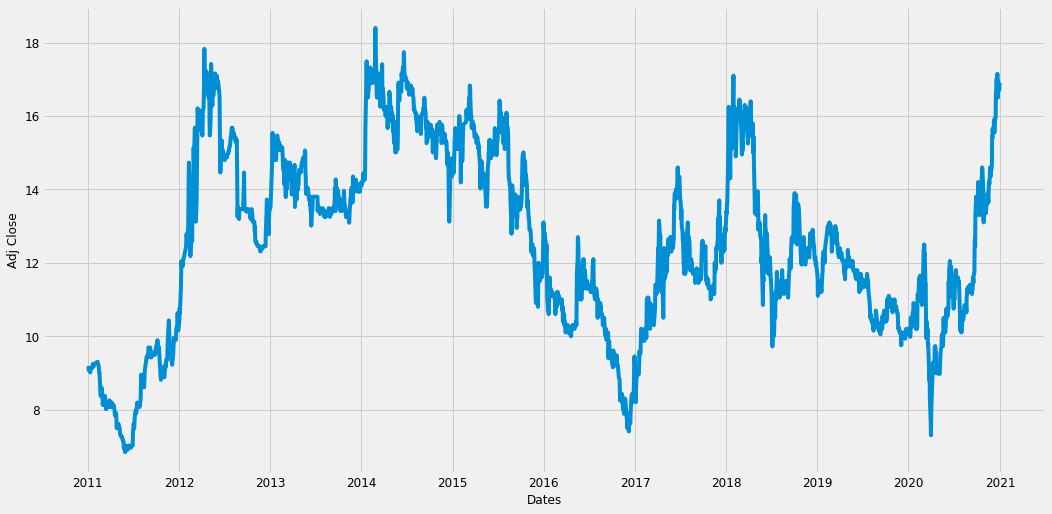

In [60]:
rcParams['axes.labelsize'] = 12
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
plt.style.context('fivethirtyeight')


data = pd.read_csv('dulieu5.csv')

# print whole sheet data

print(data.head(5))

print(data.describe())

print(data['Date'])

data['Date'] = pd.to_datetime(data['Date'],format='%d/%m/%Y')

print(data.dtypes)

data.set_index('Date',inplace=True)

data['Date'] = data.index


col_names = data.columns

plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Close')
plt.plot(data['Adj Close'])
plt.show()

Date
2011-01-31     9.154211
2011-02-28     8.856000
2011-03-31     8.163913
2011-04-30     7.924737
2011-05-31     7.230000
                ...    
2020-08-31    10.833333
2020-09-30    11.964286
2020-10-31    13.768182
2020-11-30    13.954762
2020-12-31    16.273913
Freq: M, Name: Adj Close, Length: 120, dtype: float64


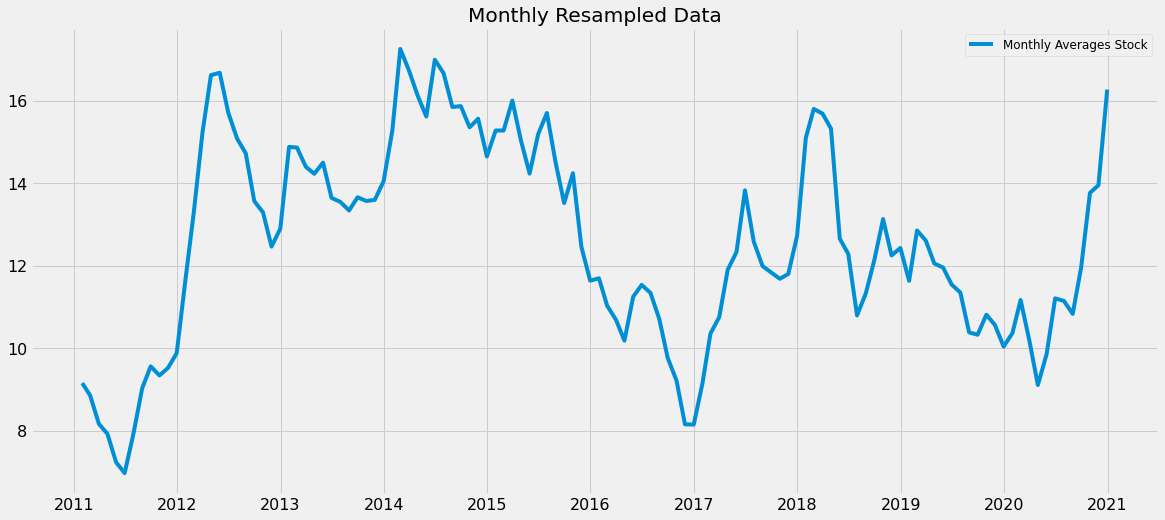

In [61]:
#Data after feature selection
data_feature_selected = data.drop(axis=1,labels=['Open','High','Low','Close','Volume'])
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)

#Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

monthly_data = monthly_mean.to_frame()

print(monthly_data['Adj Close'])

#Monthly Stock Price 
fig = plt.figure(figsize=(18,8))
plt.plot(monthly_data['Adj Close'],label='Monthly Averages Stock')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.title('Monthly Resampled Data')
plt.style.use('fivethirtyeight')
plt.legend(prop={'size': 12})
plt.show()

Data Describtion :-

Date : Date of trading

Open : Price at which security first trades

High : Highest Price of the trading day

Low : Lowest Price of the trading day

Close : Last Price the stock traded during the trading day

Adj Close : Price that is adjusts Coroporate Actions on Closing Price

Volume : Number of Shares that changed hands during the trading day

In [62]:
monthly_data['Year'] = monthly_data.index.year
monthly_data['Month'] = monthly_data.index.strftime('%B')
monthly_data['dayofweek'] = monthly_data.index.strftime('%A')
monthly_data['quarter'] = monthly_data.index.quarter

ARIMA model l√† vi·∫øt t·∫Øt c·ªßa c·ª•m t·ª´ Autoregressive Intergrated Moving Average. M√¥ h√¨nh s·∫Ω bi·ªÉu di·ªÖn ph∆∞∆°ng tr√¨nh h·ªìi qui tuy·∫øn t√≠nh ƒëa bi·∫øn (multiple linear regression) c·ªßa c√°c bi·∫øn ƒë·∫ßu v√†o (c√≤n g·ªçi l√† bi·∫øn ph·ª• thu·ªôc trong th·ªëng k√™) l√† 3 th√†nh ph·∫ßn ch√≠nh:

+ Auto regression: K√≠ hi·ªáu l√† AR. ƒê√¢y l√† th√†nh ph·∫ßn t·ª± h·ªìi quy bao g·ªìm t·∫≠p h·ª£p c√°c ƒë·ªô tr·ªÖ c·ªßa bi·∫øn hi·ªán t·∫°i.  ƒê·ªô tr·ªÖ b·∫≠c p ch√≠nh l√† gi√° tr·ªã l√πi v·ªÅ qu√° kh·ª© p b∆∞·ªõc th·ªùi gian c·ªßa chu·ªói. ƒê·ªô tr·ªÖ d√†i ho·∫∑c ng·∫Øn trong qu√° tr√¨nh AR ph·ª• thu·ªôc v√†o tham s·ªë tr·ªÖ p. Trong d·ªØ li·ªáu d√£y s·ªë th·ªùi gian s·∫Ω c√≥ m·ªôt s·ªë m·ªëi quan h·ªá t√¨m ·∫©n n√†o ƒë√≥. V√≠ d·ª• nh∆∞ m·ªëi quan h·ªá t∆∞∆°ng quan nh∆∞ v·∫≠y ƒë∆∞·ª£c g·ªçi l√† Autocorrelation. ƒê·ªÉ ph√¢n t√≠ch m·ªëi quan h·ªá ƒë·∫∑c bi·ªát n√†y ta s·∫Ω s·ª≠ d·ª•ng ph∆∞∆°ng ph√°p "lagged series", t·ª©c gi√° tr·ªã ·ªü m·ªëc th·ªùi gian tr∆∞·ªõc s·∫Ω ƒë∆∞·ª£c d·ªùi l√™n n b·∫≠c.

+ Moving average: Q√∫a tr√¨nh trung b√¨nh tr∆∞·ª£t ƒë∆∞·ª£c hi·ªÉu l√† qu√° tr√¨nh d·ªãch chuy·ªÉn ho·∫∑c thay ƒë·ªïi gi√° tr·ªã trung b√¨nh c·ªßa chu·ªïi theo th·ªùi gian. M·ª•c ƒë√≠ch ch√≠nh s·ª≠ d·ª•ng Moving average l√† lo·∫°i b·ªè c√°c y·∫øu t·ªë ng·∫´u nhi√™n, y·∫øu t·ªë nhi·ªÖu, b·∫•t th∆∞·ªùng kh√¥ng ki·ªÉm so√°t, c√≥ th·ªÉ t√°c ƒë·ªông l√™n k·∫øt qu·∫£ d·ª± b√°o gi√∫p quy tr√¨nh d·ª± b√°o tr·ªü n√™n d·ªÖ d√†ng v√† hi·ªáu qu·∫£ h∆°n. Trong m√¥ h√¨nh Arima, MA ƒë√≥ng vai tr√≤ nh∆∞ l√† c√¥ng c·ª• s·∫Ω truy su·∫•t c√°c th√¥ng tin v·ªÅ sai s·ªë d·ª± b√°o ·ªü c√°c m·ªëc th·ªùi ƒëi·ªÉm trong qu√° kh·ª© s·∫Ω ·∫£nh h∆∞·ªüng th·∫ø n√†o ƒë·∫øn sau s·ªë d·ª± b√°o ·ªü m·ªëc th·ªùi gian trong t∆∞∆°ng lai

+ Intergrated: L√† qu√° tr√¨nh ƒë·ªìng t√≠ch h·ª£p ho·∫∑c l·∫•y sai ph√¢n. Y√™u c·∫ßu chung c·ªßa c√°c thu·∫≠t to√°n trong time series l√† chu·ªói ph·∫£i ƒë·∫£m b·∫£o t√≠nh d·ª´ng. H·∫ßu h·∫øt c√°c chu·ªói ƒë·ªÅu tƒÉng ho·∫∑c gi·∫£m theo th·ªùi gian. Do ƒë√≥ y·∫øu t·ªë t∆∞∆°ng quan gi·ªØa ch√∫ng ch∆∞a ch·∫Øc l√† th·ª±c s·ª± m√† l√† do ch√∫ng c√πng t∆∞∆°ng quan theo th·ªùi gian. Khi bi·∫øn ƒë·ªïi sang chu·ªói d·ª´ng, c√°c nh√¢n t·ªë ·∫£nh h∆∞·ªüng th·ªùi gian ƒë∆∞·ª£c lo·∫°i b·ªè v√† chu·ªói s·∫Ω d·ªÖ d·ª± b√°o h∆°n. ƒê·ªÉ t·∫°o th√†nh chu·ªói d·ª´ng, m·ªôt ph∆∞∆°ng ph√°p ƒë∆°n gi·∫£n nh·∫•t l√† ch√∫ng ta s·∫Ω l·∫•y sai ph√¢n.

Nh∆∞ v·∫≠y v·ªÅ t·ªïng qu√°t th√¨ ARIMA l√† m√¥ h√¨nh k·∫øt h·ª£p c·ªßa 2 qu√° tr√¨nh t·ª± h·ªìi qui v√† trung b√¨nh tr∆∞·ª£t. D·ªØ li·ªáu trong qu√° kh·ª© s·∫Ω ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ d·ª± b√°o d·ªØ li·ªáu trong t∆∞∆°ng lai. 

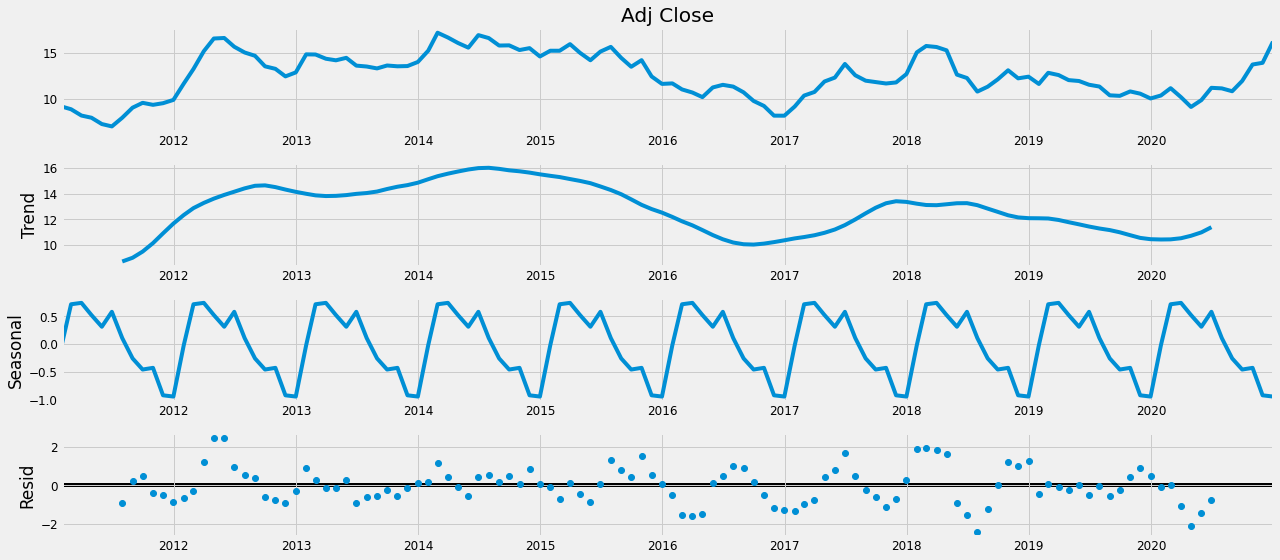

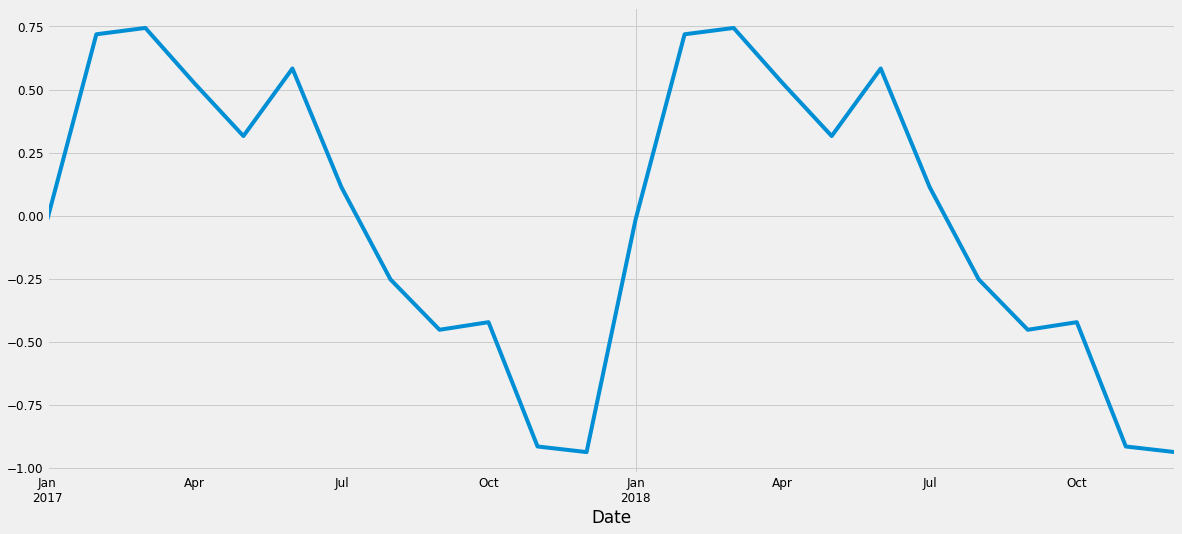

In [63]:
rcParams['figure.figsize'] = 18, 8
decomposed_series = sd(monthly_data['Adj Close'],model='additive',freq=12)
decomposed_series.plot()

plt.show()
decomposed_series.seasonal['2017':'2018'].plot()

plt.show()

t·ª´ ƒë·ªì th·ªã tr√™n ta th·∫•y:
- T√≠nh xu h∆∞·ªõng: Kh√¥ng c√≥ t√≠nh xu h∆∞·ªõng r√µ r√†ng, d·ªØ li·ªáu l√∫c l√™n l√∫c xu·ªëng v√† kh√° kh√≥ ƒëo√°n tr∆∞·ªõc ƒë∆∞·ª£c
- T√≠nh th·ªùi v·ª•: Ta th·∫•y chu·ªói c√≥ chu k√¨ 1 nƒÉm. D·ªØ li·ªáu c√≥ t√≠nh th·ªùi v·ª•, gi√° c·ªï phi·∫øu gi·∫£m v√†o nh·ªØng th√°ng g·∫ßn cu·ªëi nƒÉm v√† tƒÉng d·∫ßn t·ª´ th√°ng cu·ªëi nƒÉm ƒë·∫øn c√°c th√°ng ƒë·∫ßu nƒÉm, sau ƒë√≥ gi·∫£m d·∫ßn.

Do d·ªØ li·ªáu c√≥ t√≠nh th·ªùi v·ª• n√™n ta s·∫Ω d√πng m√¥ h√¨nh sarima ƒë·ªÉ d·ª± ƒëo√°n

T·ª± t∆∞∆°ng quan (ACF - AutoCorrelation Function): T·ª± t∆∞∆°ng quan l√† m·ªôt kh√°i ni·ªám quan tr·ªçng trong chu·ªói th·ªùi gian. H·∫ßu h·∫øt c√°c chu·ªói th·ªùi gian s·∫Ω c√≥ s·ª± t∆∞∆°ng quan v·ªõi gi√° tr·ªã tr·ªÖ c·ªßa n√≥ v√† c√°c gi√° tr·ªã c√†ng g·∫ßn nhau th√¨ t∆∞∆°ng quan c√†ng m·∫°nh ho·∫∑c c√°c gi√° tr·ªã c√πng thu·ªôc 1 chu k√¨ c·ªßa chu·ªói th√¨ s·∫Ω c√≥ t∆∞∆°ng quan cao (ch·∫≥ng h·∫°n nh∆∞ c√πng th√°ng trong chu k√¨ nƒÉm hay c√πng qu√≠ trong chu k√¨ nƒÉm). Ch√≠nh v√¨ v·∫≠y h·ªá s·ªë n√†y m·ªõi c√≥ t√™n l√† t·ª± t∆∞∆°ng quan. H·ªá s·ªë t·ª± t∆∞∆°ng quan ƒë∆∞·ª£c vi·∫øt t·∫Øt l√† ACF v√† th∆∞·ªùng d√πng ƒë·ªÉ t√¨m ra ƒë·ªô tr·ªÖ c·ªßa qu√° tr√¨nh trung b√¨nh tr∆∞·ª£t  ƒë·ªÉ x√¢y d·ª±ng c√°c m√¥ h√¨nh nh∆∞ ARIMA, GARCH, ARIMAX,‚Ä¶ v√† ki·ªÉm tra y·∫øu t·ªë m√πa v·ª•

Text(0.5, 0, 'Lags')

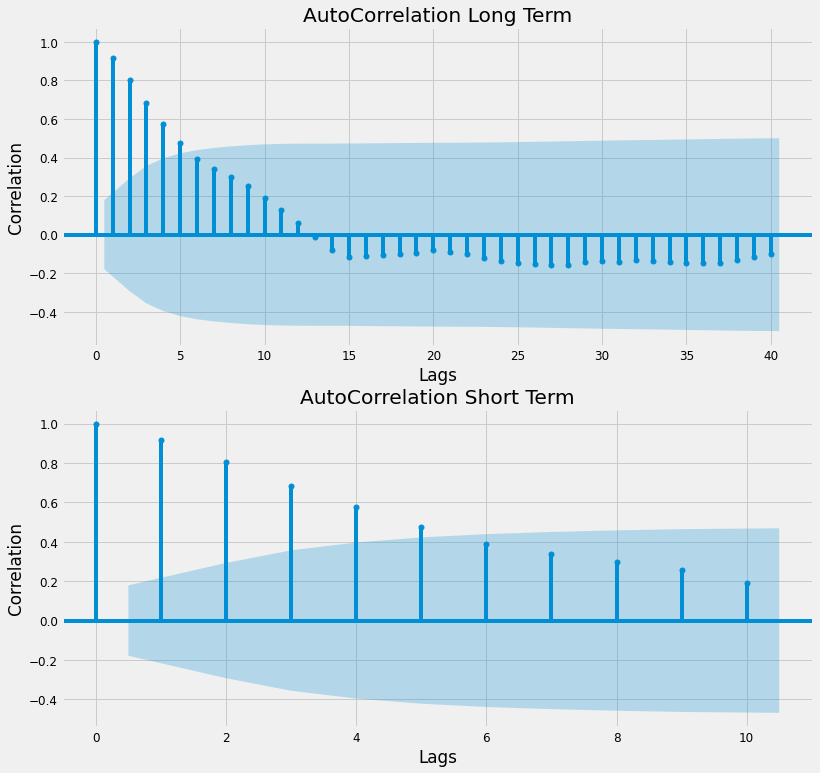

In [64]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
acf = plot_acf(monthly_data['Adj Close'],lags=40,ax=ax1)
ax1.set_title('AutoCorrelation Long Term')
acf = plot_acf(monthly_data['Adj Close'],lags=10,ax=ax2)
ax2.set_title('AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')

- Tr·ª•c ho√†nh l√† ƒë·ªô tr·ªÖ, tr·ª•c tung l√† gi√° tr·ªã c·ªßa h·ªá s·ªë t·ª± t∆∞∆°ng quan t∆∞∆°ng ·ª©ng v·ªõi ƒë·ªô tr·ªÖ. D·∫£i m√†u h·ªìng ch√≠nh l√† kho·∫£ng tin c·∫≠y 95% ƒë·ªÉ gi√° tr·ªã h·ªá s·ªë t·ª± t∆∞∆°ng quan b·∫±ng 0. 
- S·ª± suy gi·∫£m ch·∫≠m c·ªßa c√°c gi√° tr·ªã t∆∞∆°ng quan ch·ªâ ra r·∫±ng c√°c gi√° tr·ªã trong t∆∞∆°ng lai ph·ª• thu·ªôc nhi·ªÅu v√†o c√°c gi√° tr·ªã b·ªã tr·ªÖ. ƒêi·ªÅu n√†y cho th·∫•y chu·ªói kh√¥ng ph·∫£i l√† ng·∫´u nhi√™n v√† kh√¥ng ph·∫£i l√† chu·ªói c·ªë ƒë·ªãnh

T·ª± t∆∞∆°ng quan ri√™ng ph·∫ßn (PACF - Partitial AutoCorrelation Function): V·ªÅ c∆° b·∫£n t∆∞∆°ng quan ri√™ng ph·∫ßn c≈©ng l√† ch·ªâ s·ªë ƒëo l∆∞·ªùng h·ªá s·ªë t∆∞∆°ng quan nh∆∞ ACF. T·∫≠p trung t√¨m hi·ªÉu m·ªëi quan h·ªá tr·ª±c ti·∫øp gi·ªØa quan s√°t hi·ªán t·∫°i v·ªõi c√°c quan s√°t trong qu√° kh·ª©, m√† b·ªè qua c√°c m·ªëi quan h·ªá trung gian 

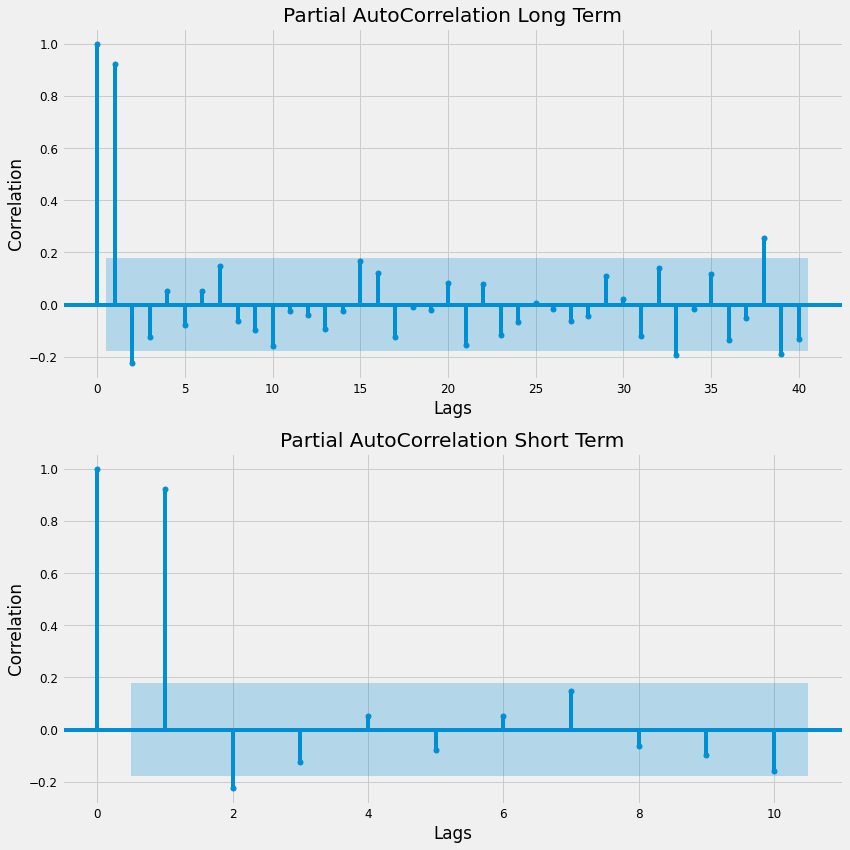

In [65]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(12,12))
pacf = plot_pacf(monthly_data['Adj Close'],lags=40,ax=ax1)
ax1.set_title('Partial AutoCorrelation Long Term')
pacf = plot_pacf(monthly_data['Adj Close'],lags=10,ax=ax2)
ax2.set_title('Partial AutoCorrelation Short Term')
ax1.set_ylabel('Correlation')
ax1.set_xlabel('Lags')
ax2.set_ylabel('Correlation')
ax2.set_xlabel('Lags')
plt.tight_layout(pad=1)

plt.show()

S·ª≠ d·ª•ng ki·ªÉm ƒë·ªãnh Dickey-fuller ƒë·ªÉ ki·ªÉm tra t√≠nh d·ª´ng. N·∫øu gi√° tr·ªã p-value l·ªõn h∆°n m·ª©c √Ω nghƒ©a, m·∫∑c ƒë·ªãnh l√† 0.05 th√¨ ta b√°c b·ªè gi·∫£ thuy·∫øt d·ªØ li·ªáu c√≥ t√≠nh d·ª´ng v√† ng∆∞·ª£c l·∫°i, n·∫øu p-value nh·ªè h∆°n 0.05 th√¨ ta c√≥ th·ªÉ k·∫øt lu·∫≠n d·ªØ li·ªáu ƒë√£ c√≥ t√≠nh d·ª´ng

In [66]:
def tsplot(y, lags=None, figsize=(14, 8), stle='bmh'):
    
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style='bmh'):
        fig = plt.figure(figsize=figsize)
        layout=(2,2)
        ts_ax = plt.subplot2grid(layout, (0,0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1,0))
        pacf_ax = plt.subplot2grid(layout, (1,1))
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

def ad_fuller_func(X):
  result_ad_fuller = adfuller(X)
  print('ADF Statistic: %f' % result_ad_fuller[0])
  print('p-value: %f' %result_ad_fuller[1])
  print('Critical Values:')
  for key, value in result_ad_fuller[4].items():
      print('\t%s: %.3f' % (key, value))
 
  if result_ad_fuller[0] < result_ad_fuller[4]['5%']:
    print('Reject Null Hypothesis(Ho)-Time Series is Stationary')
  else:
    print('Failed to Reject Ho-Time Series is Non-Stationary')

+ Tr∆∞·ªõc khi l·∫•y sai ph√¢n
ADF Statistic: -2.696955
p-value: 0.074567
Critical Values:
	1%: -3.487
	5%: -2.886
	10%: -2.580
Failed to Reject Ho-Time Series is Non-Stationary
+ Sau khi l·∫•y sai ph√¢n b·∫≠c m·ªôt
ADF Statistic: -5.202717
p-value: 0.000009
Critical Values:
	1%: -3.490
	5%: -2.887
	10%: -2.581
Reject Null Hypothesis(Ho)-Time Series is Stationary


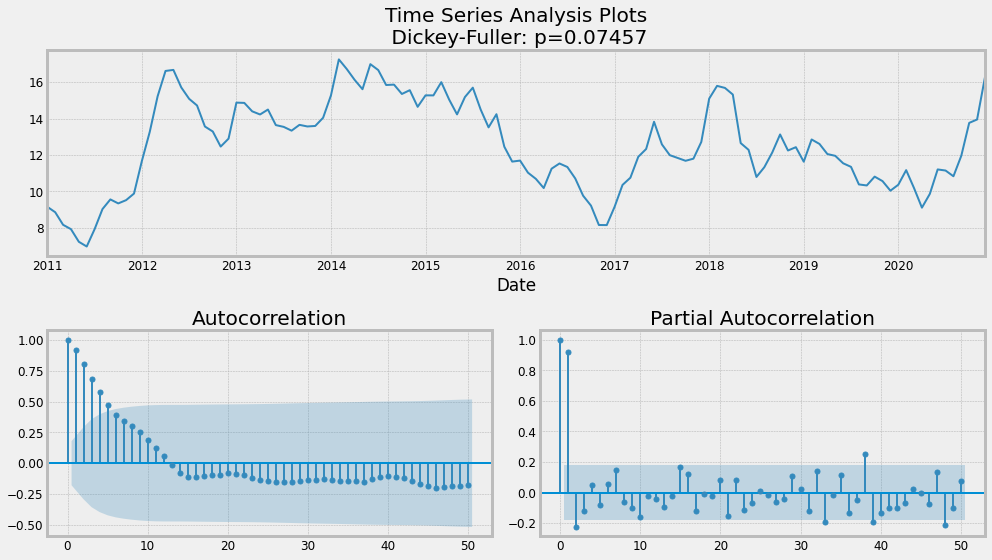

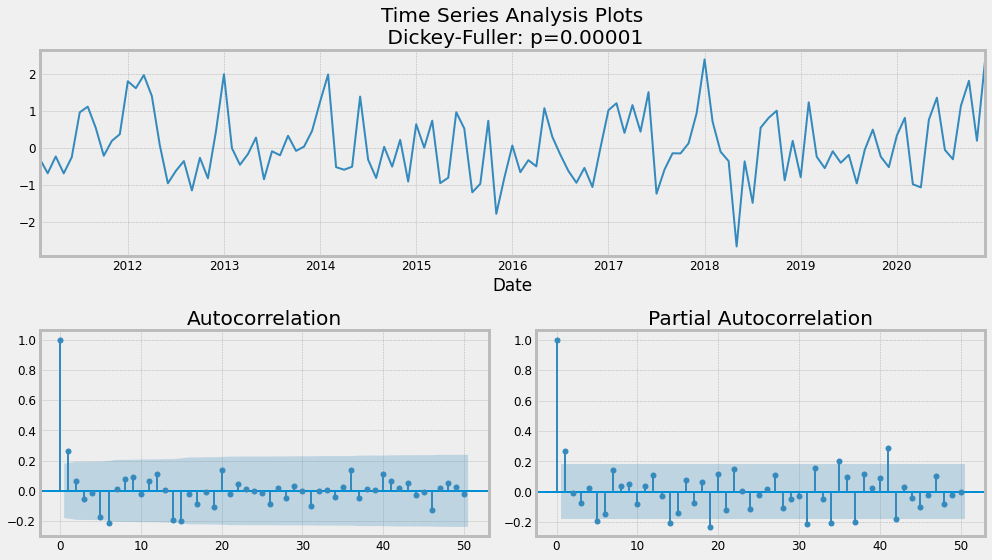

In [67]:
print("+ Tr∆∞·ªõc khi l·∫•y sai ph√¢n")
ad_fuller_func(monthly_data['Adj Close'])
tsplot(monthly_data['Adj Close'], lags=50)

#lay sai phan
print("+ Sau khi l·∫•y sai ph√¢n b·∫≠c m·ªôt")
monthly_diff = monthly_data['Adj Close'] - monthly_data['Adj Close'].shift(1)
ad_fuller_func(monthly_diff[1:])
tsplot(monthly_diff[1:], lags=50)

plt.show()

In [68]:
modelling_series = monthly_data['Adj Close']


In [69]:
train,test = split(modelling_series,train_size=0.75,shuffle=False)

print(train)
print(test)

print('Train',len(train))
print('Test',len(test))

Date
2011-01-31     9.154211
2011-02-28     8.856000
2011-03-31     8.163913
2011-04-30     7.924737
2011-05-31     7.230000
                ...    
2018-02-28    15.803333
2018-03-31    15.690909
2018-04-30    15.326316
2018-05-31    12.656818
2018-06-30    12.285714
Freq: M, Name: Adj Close, Length: 90, dtype: float64
Date
2018-07-31    10.794091
2018-08-31    11.332609
2018-09-30    12.136842
2018-10-31    13.132609
2018-11-30    12.250000
2018-12-31    12.432500
2019-01-31    11.634091
2019-02-28    12.856667
2019-03-31    12.609524
2019-04-30    12.055263
2019-05-31    11.956818
2019-06-30    11.547500
2019-07-31    11.350000
2019-08-31    10.384091
2019-09-30    10.327500
2019-10-31    10.813043
2019-11-30    10.566667
2019-12-31    10.039545
2020-01-31    10.366471
2020-02-29    11.170000
2020-03-31    10.180455
2020-04-30     9.106500
2020-05-31     9.861500
2020-06-30    11.209091
2020-07-31    11.147826
2020-08-31    10.833333
2020-09-30    11.964286
2020-10-31    13.768182
2

D∆∞·ªõi ƒë√¢y l√† h√†m ƒë·ªÉ ch·ªçn ra m√¥ h√¨nh sarima t·ªët nh·∫•t d·ª±a tr√™n ch·ªâ s·ªë AIC(Akaike Information Criteria), m·ªôt trong nh·ªØng ti√™u ch√≠ th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ l·ª±a ch·ªçn m√¥ h√¨nh Arima v·ªõi p,d,q t·ªëi ∆∞u nh·∫•t. Ti√™u ch√≠ th√¥ng tin n√†y l√† m·ªôt c√¥ng c·ª• ∆∞·ªõc t√≠nh l·ªói d·ª± b√°o v√† do ƒë√≥ ƒë√°nh gi√° ch·∫•t l∆∞·ª£ng t∆∞∆°ng ƒë·ªëi c·ªßa c√°c m√¥ h√¨nh th·ªëng k√™ tr√™n m·ªôt t·∫≠p h·ª£p d·ªØ li·ªáu nh·∫•t ƒë·ªãnh. G·ªâa s·ª≠ c√≥ m·ªôt t·∫≠p h·ª£p c√°c m√¥ h√¨nh ƒë∆∞·ª£c x√¢y d·ª±ng tr√™n c√πng m·ªôt b·ªô d·ªØ li·ªáu, AIC ∆∞·ªõc t√≠nh ch·∫•t l∆∞·ª£ng c·ªßa t·ª´ng m√¥ h√¨nh trong m·ªëi li√™n quan ƒë·∫øn t·ª´ng m√¥ h√¨nh kh√°c. Do ƒë√≥, AIC cung c·∫•p m·ªôt ph∆∞∆°ng ti·ªán ƒë·ªÉ l·ª±a ch·ªçn m√¥ h√¨nh. AIC ƒë∆∞·ª£c h√¨nh th√†nh d·ª±a tr√™n l√Ω thuy·∫øt th√¥ng tin (information theory). Khi m·ªôt m√¥ h√¨nh th·ªëng k√™ ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ d·ª± b√°o, k·∫øt qu·∫£ s·∫Ω g·∫ßn nh∆∞ kh√¥ng bao gi·ªù ch√≠nh x√°c ho√†n to√†n. V√¨ v·∫≠y m·ªôt s·ªë th√¥ng tin s·∫Ω b·ªã m·∫•t do kh√¥ng th·ªÉ d·ª± b√°o t·ª´ m√¥ h√¨nh. AIC ∆∞·ªõc t√≠nh l∆∞·ª£ng th√¥ng tin t∆∞∆°ng ƒë·ªëi b·ªã m·∫•t b·ªüi m·ªôt m√¥ h√¨nh nh·∫•t ƒë·ªãnh: m√¥ h√¨nh m·∫•t c√†ng √≠t th√¥ng tin th√¨ ch·∫•t l∆∞·ª£ng c·ªßa m√¥ h√¨nh ƒë√≥ c√†ng cao. V√¨ v·∫≠y m√¥ h√¨nh n√†o c√≥ AIC c√†ng th·∫•p th√¨ c√†ng t·ªët. D∆∞·ªõi ƒë√¢y l√† h√†m ch·ªçn ra m√¥ h√¨nh Sarima t·ªët nh·∫•t.

In [19]:
def sarima_grid_search(y,seasonal_period):
    p = d = q = range(0, 3)
    pdq = list(itertools.product(p, d, q))
    seasonal_pdq = [(x[0], x[1], x[2],seasonal_period) for x in list(itertools.product(p, d, q))]
    
    mini = float('+inf')
    
    
    for param in pdq:
        for param_seasonal in seasonal_pdq:
            try:
                mod = sm.tsa.statespace.SARIMAX(y,
                                                order=param,
                                                seasonal_order=param_seasonal,
                                                enforce_stationarity=False,
                                                enforce_invertibility=False)

                results = mod.fit(disp=-1)
                
                if results.aic < mini:
                    mini = results.aic
                    param_mini = param
                    param_seasonal_mini = param_seasonal

                print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results.aic))
            except:
                continue
    print('The set of parameters with the minimum AIC is: SARIMA{}x{} - AIC:{}'.format(param_mini, param_seasonal_mini, mini))

sarima_grid_search(train,12)

SARIMA(0, 0, 0)x(0, 0, 0, 12) - AIC:713.7312468610816
SARIMA(0, 0, 0)x(0, 0, 1, 12) - AIC:558.2332549175668
SARIMA(0, 0, 0)x(0, 0, 2, 12) - AIC:2788.7768958134857
SARIMA(0, 0, 0)x(0, 1, 0, 12) - AIC:414.04332250511743
SARIMA(0, 0, 0)x(0, 1, 1, 12) - AIC:315.35069586825665
SARIMA(0, 0, 0)x(0, 1, 2, 12) - AIC:2283.829960149403
SARIMA(0, 0, 0)x(0, 2, 0, 12) - AIC:393.0359571590189
SARIMA(0, 0, 0)x(0, 2, 1, 12) - AIC:295.9514011909449
SARIMA(0, 0, 0)x(0, 2, 2, 12) - AIC:239.65206975181118
SARIMA(0, 0, 0)x(1, 0, 0, 12) - AIC:420.7794909438948
SARIMA(0, 0, 0)x(1, 0, 1, 12) - AIC:404.8443432035173
SARIMA(0, 0, 0)x(1, 0, 2, 12) - AIC:2439.493162945685
SARIMA(0, 0, 0)x(1, 1, 0, 12) - AIC:323.23063946723715
SARIMA(0, 0, 0)x(1, 1, 1, 12) - AIC:319.2191479466425
SARIMA(0, 0, 0)x(1, 1, 2, 12) - AIC:2253.0674268045946
SARIMA(0, 0, 0)x(1, 2, 0, 12) - AIC:304.1503623167705
SARIMA(0, 0, 0)x(1, 2, 1, 12) - AIC:291.8610443757085
SARIMA(0, 0, 0)x(1, 2, 2, 12) - AIC:225.79001694592606
SARIMA(0, 0, 0)x(2, 0

SARIMA(0, 1, 2)x(1, 2, 1, 12) - AIC:179.93232914782544
SARIMA(0, 1, 2)x(1, 2, 2, 12) - AIC:139.5296398223894
SARIMA(0, 1, 2)x(2, 0, 0, 12) - AIC:171.9496161389176
SARIMA(0, 1, 2)x(2, 0, 1, 12) - AIC:173.0184234651081
SARIMA(0, 1, 2)x(2, 0, 2, 12) - AIC:1900.8439589602829
SARIMA(0, 1, 2)x(2, 1, 0, 12) - AIC:150.6426316013951
SARIMA(0, 1, 2)x(2, 1, 1, 12) - AIC:149.49521828541873
SARIMA(0, 1, 2)x(2, 1, 2, 12) - AIC:137.09437907901116
SARIMA(0, 1, 2)x(2, 2, 0, 12) - AIC:140.27186535741387
SARIMA(0, 1, 2)x(2, 2, 1, 12) - AIC:141.34246072537272
SARIMA(0, 1, 2)x(2, 2, 2, 12) - AIC:124.18325771952591
SARIMA(0, 2, 0)x(0, 0, 0, 12) - AIC:258.0003690575851
SARIMA(0, 2, 0)x(0, 0, 1, 12) - AIC:229.60036535298804
SARIMA(0, 2, 0)x(0, 0, 2, 12) - AIC:2417.3690023026866
SARIMA(0, 2, 0)x(0, 1, 0, 12) - AIC:261.1001359870246
SARIMA(0, 2, 0)x(0, 1, 1, 12) - AIC:201.83949913104203
SARIMA(0, 2, 0)x(0, 1, 2, 12) - AIC:2367.0937171967416
SARIMA(0, 2, 0)x(0, 2, 0, 12) - AIC:285.8813617794706
SARIMA(0, 2, 0)x(

SARIMA(1, 0, 2)x(0, 1, 1, 12) - AIC:171.1987955687652
SARIMA(1, 0, 2)x(0, 1, 2, 12) - AIC:2173.3589914960958
SARIMA(1, 0, 2)x(0, 2, 0, 12) - AIC:247.8903339286688
SARIMA(1, 0, 2)x(0, 2, 1, 12) - AIC:175.87904890718403
SARIMA(1, 0, 2)x(0, 2, 2, 12) - AIC:133.42948127167503
SARIMA(1, 0, 2)x(1, 0, 0, 12) - AIC:207.66172401920352
SARIMA(1, 0, 2)x(1, 0, 1, 12) - AIC:198.15445835298365
SARIMA(1, 0, 2)x(1, 0, 2, 12) - AIC:2560.5876865049922
SARIMA(1, 0, 2)x(1, 1, 0, 12) - AIC:191.09166669407324
SARIMA(1, 0, 2)x(1, 1, 1, 12) - AIC:173.1988140050875
SARIMA(1, 0, 2)x(1, 1, 2, 12) - AIC:2104.248441075974
SARIMA(1, 0, 2)x(1, 2, 0, 12) - AIC:198.5192680853365
SARIMA(1, 0, 2)x(1, 2, 1, 12) - AIC:181.52721224877348
SARIMA(1, 0, 2)x(1, 2, 2, 12) - AIC:142.04561736177232
SARIMA(1, 0, 2)x(2, 0, 0, 12) - AIC:173.4555776488849
SARIMA(1, 0, 2)x(2, 0, 1, 12) - AIC:174.62458221016348
SARIMA(1, 0, 2)x(2, 0, 2, 12) - AIC:2461.2283692221463
SARIMA(1, 0, 2)x(2, 1, 0, 12) - AIC:150.62241204552143
SARIMA(1, 0, 2)x

SARIMA(1, 2, 1)x(2, 0, 1, 12) - AIC:172.81965633548992
SARIMA(1, 2, 1)x(2, 0, 2, 12) - AIC:2714.575431570769
SARIMA(1, 2, 1)x(2, 1, 0, 12) - AIC:146.05093959976315
SARIMA(1, 2, 1)x(2, 1, 1, 12) - AIC:147.46848880691036
SARIMA(1, 2, 1)x(2, 1, 2, 12) - AIC:140.06320778730395
SARIMA(1, 2, 1)x(2, 2, 0, 12) - AIC:134.11439394517862
SARIMA(1, 2, 1)x(2, 2, 1, 12) - AIC:135.07983781447476
SARIMA(1, 2, 1)x(2, 2, 2, 12) - AIC:129.68975348027246
SARIMA(1, 2, 2)x(0, 0, 0, 12) - AIC:228.51880243728976
SARIMA(1, 2, 2)x(0, 0, 1, 12) - AIC:195.39798552874475
SARIMA(1, 2, 2)x(0, 0, 2, 12) - AIC:2396.428598612628
SARIMA(1, 2, 2)x(0, 1, 0, 12) - AIC:237.49617807823884
SARIMA(1, 2, 2)x(0, 1, 1, 12) - AIC:172.57884051704758
SARIMA(1, 2, 2)x(0, 1, 2, 12) - AIC:2461.548794904935
SARIMA(1, 2, 2)x(0, 2, 0, 12) - AIC:253.29663723637358
SARIMA(1, 2, 2)x(0, 2, 1, 12) - AIC:173.8689833717934
SARIMA(1, 2, 2)x(0, 2, 2, 12) - AIC:132.26575281453717
SARIMA(1, 2, 2)x(1, 0, 0, 12) - AIC:208.38721644139463
SARIMA(1, 2, 2

SARIMA(2, 1, 1)x(0, 2, 2, 12) - AIC:134.8393081303027
SARIMA(2, 1, 1)x(1, 0, 0, 12) - AIC:196.54390337848778
SARIMA(2, 1, 1)x(1, 0, 1, 12) - AIC:196.64011912570126
SARIMA(2, 1, 1)x(1, 0, 2, 12) - AIC:2264.962168998066
SARIMA(2, 1, 1)x(1, 1, 0, 12) - AIC:189.16554593669127
SARIMA(2, 1, 1)x(1, 1, 1, 12) - AIC:176.6523333510659
SARIMA(2, 1, 1)x(1, 1, 2, 12) - AIC:2287.841763649313
SARIMA(2, 1, 1)x(1, 2, 0, 12) - AIC:193.35467381942877
SARIMA(2, 1, 1)x(1, 2, 1, 12) - AIC:184.44355714879183
SARIMA(2, 1, 1)x(1, 2, 2, 12) - AIC:143.15092043425483
SARIMA(2, 1, 1)x(2, 0, 0, 12) - AIC:170.71884544491073
SARIMA(2, 1, 1)x(2, 0, 1, 12) - AIC:170.4924967029257
SARIMA(2, 1, 1)x(2, 0, 2, 12) - AIC:16.0
SARIMA(2, 1, 1)x(2, 1, 0, 12) - AIC:143.3176227692977
SARIMA(2, 1, 1)x(2, 1, 1, 12) - AIC:141.43838755132745
SARIMA(2, 1, 1)x(2, 1, 2, 12) - AIC:141.09038386268526
SARIMA(2, 1, 1)x(2, 2, 0, 12) - AIC:128.9641088219753
SARIMA(2, 1, 1)x(2, 2, 1, 12) - AIC:129.0167151427474
SARIMA(2, 1, 1)x(2, 2, 2, 12) - 

In [70]:
model = sm.tsa.SARIMAX(train,order=(2,1,1),seasonal_order=(0,0,2,12))
results=model.fit(disp=-1)
forecasts_train = results.predict(start='2011-01-31',end='2018-06-30')
forecasts_test = results.predict(start='2018-07-31',end='2020-12-31')
print(results.summary())

                                        SARIMAX Results                                        
Dep. Variable:                               Adj Close   No. Observations:                   90
Model:             SARIMAX(2, 1, 1)x(0, 0, [1, 2], 12)   Log Likelihood                -109.818
Date:                                 Sat, 14 Aug 2021   AIC                            231.637
Time:                                         13:40:04   BIC                            246.569
Sample:                                     01-31-2011   HQIC                           237.655
                                          - 06-30-2018                                         
Covariance Type:                                   opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1123      3.170     -0.035      0.972      -6.326       6

B·∫£ng tr√™n ch√≠nh l√† summary k·∫øt qu·∫£ t·ª´ m√¥ h√¨nh SARIMA.
- C·ªôt coef l√† gi√° tr·ªã h·ªá s·ªë ∆∞·ªõc l∆∞·ª£ng t·ª´ m√¥ h√¨nh t∆∞∆°ng ·ª©ng v·ªõi c√°c bi·∫øn ·ªü c·ªôt b√™n tay tr√°i.
- C·ªôt std err l√† ƒë·ªô l·ªách chu·∫©n c·ªßa h·ªá s·ªë ∆∞·ªõc l∆∞·ª£ng. T·ª´ gi√° tr·ªã ∆∞·ªõc l∆∞·ª£ng v√† ƒë·ªô l·ªách chu·∫©n ta c√≥ th·ªÉ t√≠nh to√°n ra ƒë∆∞·ª£c kho·∫£ng tin c·∫≠y. C·∫≠n tr√™n v√† d∆∞·ªõi c·ªßa kho·∫£ng tin c·∫≠y l√† c√°c c·ªôt [0.025 v√† 0.975].
- C·ªôt z ch√≠nh l√† gi√° tr·ªã ng∆∞·ª°ng t·ªõi h·∫°n ƒë∆∞·ª£c suy ra t·ª´ ph√¢n ph·ªëi chu·∫©n h√≥a. 
- C·ªôt P>|z| ch√≠nh l√† gi√° tr·ªã P-value c·ªßa c·∫∑p gi·∫£ thuy·∫øt d·∫•u b·∫±ng. G√≠a tr·ªã c·ªßa P-value < 0.05 s·∫Ω cho th·∫•y h·ªá s·ªë ∆∞·ªõc l∆∞·ª£ng l·ªõn h∆°n 0 l√† c√≥ √Ω nghƒ©a th·ªëng k√™.

C√°c ch·ªâ s·ªë ·ªü g√≥c tr√™n b√™n ph·∫£i l·∫ßn l∆∞·ª£t l√†:
- No. Observations: S·ªë l∆∞·ª£ng quan s√°t
- Log Likelihood: G√≠a tr·ªã h√†m logarit ∆∞·ªõc l∆∞·ª£ng h·ª£p l√Ω t·ªëi ƒëa.
- AIC: Ch·ªâ s·ªë Akaike Information Criteria
- BIC: Ch·ªâ s·ªë Bayesian Information Criteria. Ch·ªâ s·ªë n√†y c≈©ng c√≥ ch·ª©c nƒÉng ƒëo l∆∞·ªùng sai s·ªë c·ªßa m√¥ h√¨nh nh∆∞ AIC nh∆∞ng theo tr∆∞·ªùng ph√°i th·ªëng k√™ suy di·ªÖn (statistical inference).

Ch√∫ng ta bi·∫øt r·∫±ng m·ªôt m√¥ h√¨nh c√≥ th·ªÉ fit v·ªõi t·∫≠p hu·∫•n luy·ªán nh∆∞ng ch∆∞a ch·∫Øc ƒë√£ t·ªët khi d·ª± b√°o. Ch√≠nh v√¨ th·∫ø c·∫ßn ki·ªÉm tra ch·∫•t l∆∞·ª£ng c·ªßa m√¥ h√¨nh tr√™n t·∫≠p d·ª± b√°o. Trong m√¥ h√¨nh ph√¢n lo·∫°i ch√∫ng ta th∆∞·ªùng quan t√¢m ƒë·∫øn t·ª∑ l·ªá ch√≠nh x√°c accuracy, trong tr∆∞·ªùng h·ª£p m·∫´u m·∫•t c√¢n b·∫±ng th√¨ precision, recall, f1 l√† nh·ªØng ch·ªâ s·ªë ƒëo l∆∞·ªùng ƒë·ªô ch√≠nh x√°c kh√°c ƒë∆∞·ª£c thay th·∫ø. Tuy nhi√™n v·ªõi l·ªõp m√¥ h√¨nh d·ª± b√°o th√¨ s·∫Ω s·ª≠ d·ª•ng m·ªôt t·∫≠p h·ª£p c√°c tham s·ªë kh√°c li√™n quan ƒë·∫øn ƒëo l∆∞·ªùng sai s·ªë gi·ªØa gi√° tr·ªã d·ª± b√°o v√† gi√° tr·ªã th·ª±c t·∫ø. ƒê√≥ l√† c√°c ch·ªâ s·ªë:

- MSE (mean square error): Trung b√¨nh t·ªïng b√¨nh ph∆∞∆°ng sai s·ªë.
- RMSE (root mean square error): Ph∆∞∆°ng sai ho·∫∑c ƒë·ªô l·ªách chu·∫©n c·ªßa chu·ªói d·ª± b√°o so v·ªõi th·ª±c t·∫ø.
- MAE (mean absolute error): Trung b√¨nh tr·ªã tuy·ªát ƒë·ªëi sai s·ªë. Ch√≠nh l√† kho·∫£ng c√°ch theo norm chu·∫©n b·∫≠c 1 gi·ªØa gi√° tr·ªã d·ª± b√°o v√† gi√° tr·ªã th·ª±c t·∫ø. D√†nh cho b·∫°n n·∫øu ch∆∞a bi·∫øt v·ªÅ norm chu·∫©n b·∫≠c 1 ho·∫∑c L1 norm.
- MAPE (mean absolute percentage error): Trung b√¨nh ph·∫ßn trƒÉm tr·ªã tuy·ªát ƒë·ªëi sai s·ªë. Ch·ªâ s·ªë n√†y cho bi·∫øt gi√° tr·ªã d·ª± b√°o sai l·ªách bao nhi√™u ph·∫ßn trƒÉm so v·ªõi gi√° tr·ªã th·ª±c t·∫ø. L∆∞u √Ω ta ch·ªâ t√≠nh ƒë∆∞·ª£c ch·ªâ s·ªë n√†y ch·ªâ khi gi√° tr·ªã th·ª±c t·∫ø ƒë·ªÅu kh√°c 0.
- Accuracy: Th∆∞·ªõc ƒëo ƒë·ªô ch√≠nh x√°c c·ªßa thu·∫≠t to√°n

In [71]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

##Function to Calculate Result Metrics
def result_metrics(test_series,forecast_series,model_name):
  print('Result Metrics for {}'.format(model_name))
  print('Mean Square Error : ',round(mean_squared_error(test_series,forecast_series),3))
  print('Root Mean Squared Error : ',math.sqrt(round(mean_squared_error(test_series,forecast_series),3)))
  print('Mean Absolute Error : ',round(mean_absolute_error(test_series,forecast_series),3))
  print('Mean Absolute Percentage Error',round(mean_absolute_percentage_error(test_series,forecast_series),3))
  list_result_metrics = []
  list_result_metrics.extend([round(mean_squared_error(test_series,forecast_series),3),math.sqrt(round(mean_squared_error(test_series,forecast_series),3)),round(mean_absolute_error(test_series,forecast_series),3),round(mean_absolute_percentage_error(test_series,forecast_series),3)])
  return list_result_metrics

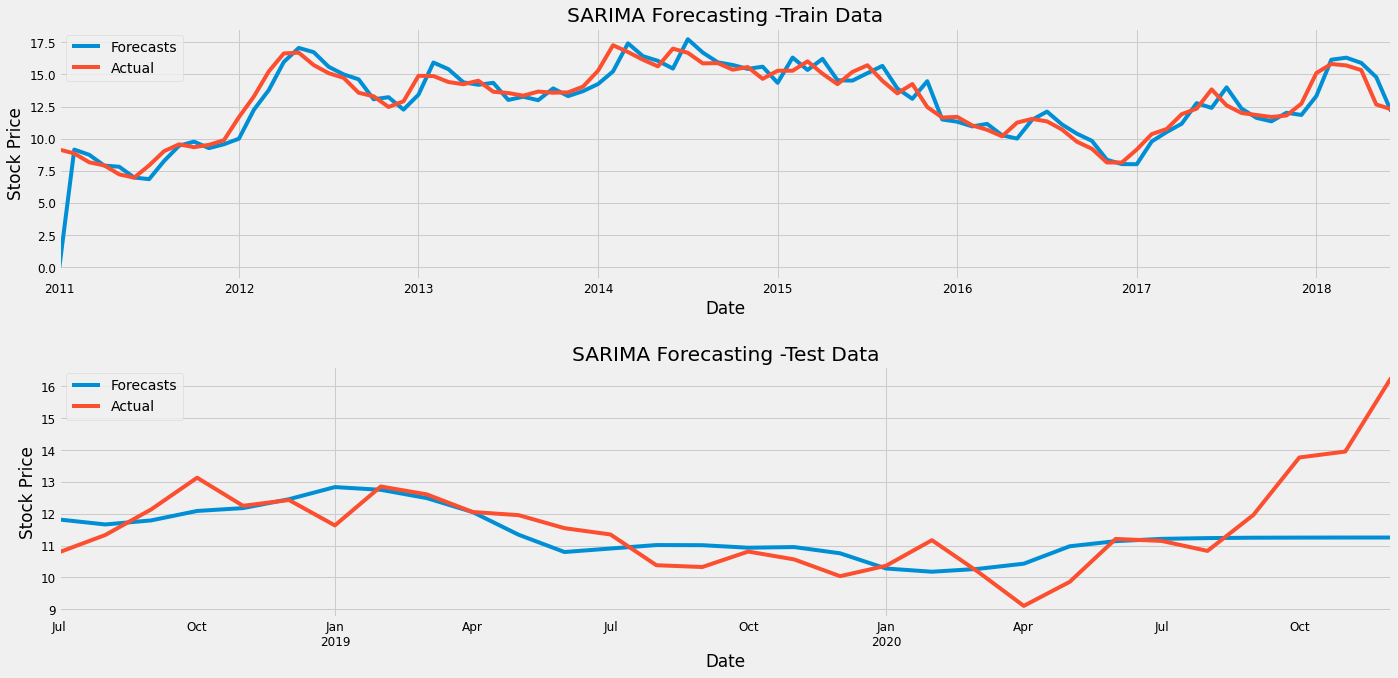

In [72]:
fig,(ax1,ax2) = plt.subplots(2,figsize=(20,10))
forecasts_train.plot(label='Forecasts',ax=ax1,title='SARIMA Forecasting -Train Data')
train.plot(label='Actual',ax=ax1)
ax1.set_ylabel('Stock Price')
forecasts_test.plot(label='Forecasts',ax=ax2,title='SARIMA Forecasting -Test Data')
test.plot(label='Actual',ax=ax2)
ax2.set_ylabel('Stock Price')
ax1.legend()
ax2.legend()
plt.tight_layout(pad=2)
plt.show()

In [73]:
# print(result_metrics(train,forecasts_train,'SARIMA-Train Data'))
print('----')
result_metrics_sarima = result_metrics(test,forecasts_test,'SARIMA-Test Data')

----
Result Metrics for SARIMA-Test Data
Mean Square Error :  1.669
Root Mean Squared Error :  1.2918978287774927
Mean Absolute Error :  0.791
Mean Absolute Percentage Error 6.405


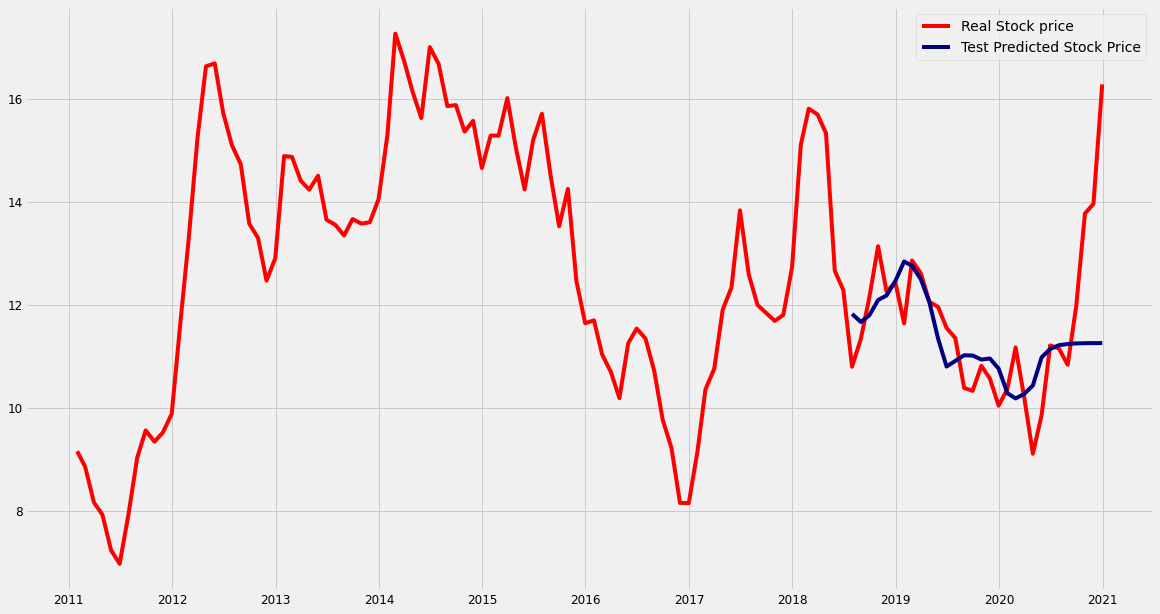

In [74]:
plt.figure(figsize=(18,10))
# plt.plot(train.index, train, color='yellow', label = 'Train Stock price')
plt.plot(modelling_series.index, modelling_series, color='red', label = 'Real Stock price')
# plt.plot(test.index, test, color='red', label='Real Stock Price')
plt.plot(test.index, forecasts_test, color='navy', label='Test Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


In [75]:
smoothing_data = monthly_data


# PROPHET 


Prophet c≈©ng √°p ƒë·∫∑t ƒëi·ªÅu ki·ªán nghi√™m ng·∫∑t r·∫±ng c√°c c·ªôt ƒë·∫ßu v√†o ph·∫£i ƒë∆∞·ª£c ƒë·∫∑t t√™n l√† ds (c·ªôt th·ªùi gian) v√† y (c·ªôt s·ªë li·ªáu), v√¨ v·∫≠y h√£y ƒë·ªïi t√™n c√°c c·ªôt trong DataFrame :

In [76]:
prophet_data = monthly_data
prophet_data['Date'] = prophet_data.index

prophet_data.drop(labels=['Year','Month'],axis=1,inplace=True)

prophet_data = prophet_data.reindex(columns=['Date','Adj Close'])

##Prophet needs two columns in form of ds and y being Date and series
prophet_data.rename(columns={'Date':'ds',
                   'Adj Close':'y'},inplace=True)
print(prophet_data)

                   ds          y
Date                            
2011-01-31 2011-01-31   9.154211
2011-02-28 2011-02-28   8.856000
2011-03-31 2011-03-31   8.163913
2011-04-30 2011-04-30   7.924737
2011-05-31 2011-05-31   7.230000
...               ...        ...
2020-08-31 2020-08-31  10.833333
2020-09-30 2020-09-30  11.964286
2020-10-31 2020-10-31  13.768182
2020-11-30 2020-11-30  13.954762
2020-12-31 2020-12-31  16.273913

[120 rows x 2 columns]


In [77]:
prophet_train,prophet_test = split(prophet_data,train_size=0.75,shuffle=False)
print('Training Data Size :',len(prophet_train))
print('Testing Data Size :',len(prophet_test))

Training Data Size : 90
Testing Data Size : 30


Trong ƒëo·∫°n m√£ ·ªü tr√™n, ta ƒë√£ h∆∞·ªõng d·∫´n Prophet t·∫°o 30 d·∫•u d·ªØ li·ªáu trong t∆∞∆°ng lai.

Khi l√†m vi·ªác v·ªõi Prophet, ƒëi·ªÅu quan tr·ªçng l√† ph·∫£i xem x√©t t·∫ßn su·∫•t c·ªßa chu·ªói th·ªùi gian c·ªßa ta . B·ªüi v√¨ ta ƒëang l√†m vi·ªác v·ªõi d·ªØ li·ªáu h√†ng th√°ng, ta ƒë√£ ch·ªâ ƒë·ªãnh r√µ r√†ng t·∫ßn su·∫•t mong mu·ªën c·ªßa d·∫•u th·ªùi gian (trong tr∆∞·ªùng h·ª£p n√†y, M l√† cu·ªëi th√°ng). Do ƒë√≥, make_future_dataframe t·∫°o ra 30 d·∫•u th·ªùi gian h√†ng th√°ng cho ta . N√≥i c√°ch kh√°c, ta ƒëang t√¨m c√°ch d·ª± ƒëo√°n c√°c gi√° tr·ªã t∆∞∆°ng lai c·ªßa chu·ªói th·ªùi gian c·ªßa ta trong 30 th√°ng t·ªõi.

In [78]:
prophet_model = Prophet(yearly_seasonality=True)
prophet_model.fit(prophet_train)

future= prophet_model.make_future_dataframe(periods=30,freq='M')

print(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


            ds
0   2011-01-31
1   2011-02-28
2   2011-03-31
3   2011-04-30
4   2011-05-31
..         ...
115 2020-08-31
116 2020-09-30
117 2020-10-31
118 2020-11-30
119 2020-12-31

[120 rows x 1 columns]


In [79]:
forecast=prophet_model.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
115 2020-08-31  10.487310    7.669134   13.225248
116 2020-09-30  10.021745    7.283675   12.786944
117 2020-10-31   9.784828    7.229910   12.322890
118 2020-11-30   9.371860    6.707294   11.886458
119 2020-12-31   9.723821    7.076950   12.470846

Prophet tr·∫£ v·ªÅ m·ªôt DataFrame l·ªõn v·ªõi nhi·ªÅu c·ªôt th√∫ v·ªã, nh∆∞ng ta ƒë·∫∑t k·∫øt qu·∫£ c·ªßa b·∫°n cho c√°c c·ªôt ph√π h·ª£p nh·∫•t v·ªõi d·ª± b√°o, ƒë√≥ l√†:

ds : d·∫•u d·ªØ li·ªáu c·ªßa gi√° tr·ªã d·ª± b√°o
yhat : gi√° tr·ªã d·ª± b√°o c·ªßa ch·ªâ s·ªë c·ªßa ta (trong Th·ªëng k√™, yhat l√† k√Ω hi·ªáu th∆∞·ªùng ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ bi·ªÉu th·ªã c√°c gi√° tr·ªã d·ª± ƒëo√°n c·ªßa m·ªôt gi√° tr·ªã y )
yhat_lower : gi·ªõi h·∫°n d∆∞·ªõi c·ªßa d·ª± b√°o c·ªßa ta
yhat_upper : gi·ªõi h·∫°n tr√™n c·ªßa d·ª± b√°o c·ªßa ta

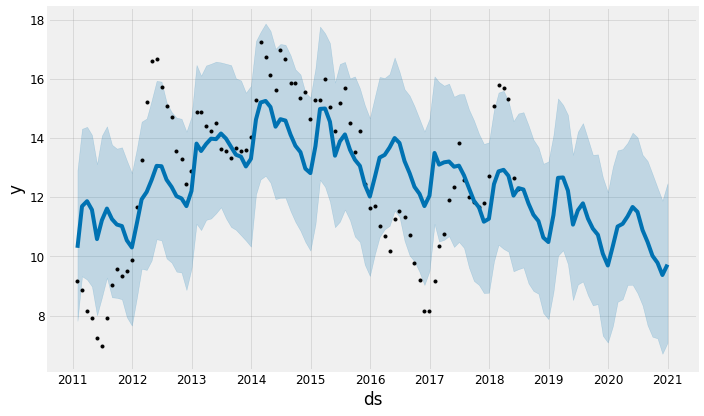

In [80]:
fig1 = prophet_model.plot(forecast)

Prophet v·∫Ω bi·ªÉu ƒë·ªì c√°c gi√° tr·ªã quan s√°t ƒë∆∞·ª£c c·ªßa chu·ªói th·ªùi gian c·ªßa ta (c√°c ch·∫•m ƒëen), c√°c gi√° tr·ªã d·ª± b√°o (ƒë∆∞·ªùng m√†u xanh lam) v√† kho·∫£ng th·ªùi gian kh√¥ng ch·∫Øc ch·∫Øn c·ªßa c√°c d·ª± b√°o c·ªßa ta (c√°c v√πng t√¥ b√≥ng m√†u xanh lam).

M·ªôt t√≠nh nƒÉng ƒë·∫∑c bi·ªát m·∫°nh m·∫Ω kh√°c c·ªßa Prophet l√† kh·∫£ nƒÉng tr·∫£ v·ªÅ c√°c th√†nh ph·∫ßn c·ªßa d·ª± b√°o c·ªßa ta . ƒêi·ªÅu n√†y c√≥ th·ªÉ gi√∫p ti·∫øt l·ªô c√°ch h√†ng ng√†y, h√†ng tu·∫ßn v√† h√†ng nƒÉm c·ªßa chu·ªói th·ªùi gian ƒë√≥ng g√≥p v√†o c√°c gi√° tr·ªã d·ª± b√°o t·ªïng th·ªÉ:

M·ªôt t√≠nh nƒÉng m·∫°nh m·∫Ω c·ªßa thu·∫≠t to√°n prophet l√† tr·∫£ v·ªÅ c√°c th√†nh ph·∫ßn c·ªßa d·ª± b√°o. ƒêi·ªÅu n√†y gi√∫p ti·∫øt l·ªô c√°c m·∫´u chu·ªói th·ªùi gian h·∫±ng nƒÉm ƒë√≥ng g√≥p nh∆∞ th·∫ø n√†o v√†o c√°c gi√° tr·ªã d·ª± b√°o t·ªïng th·ªÉ

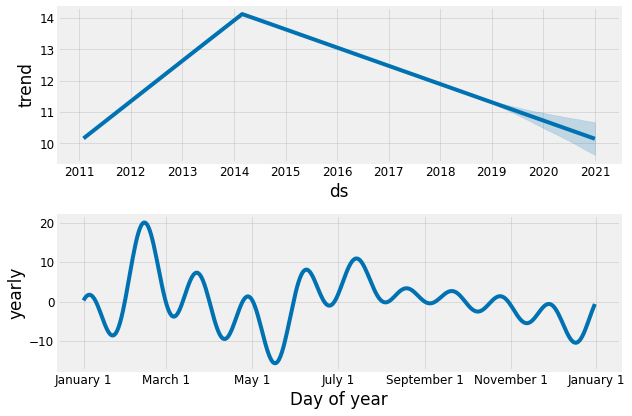

In [81]:
fig2 = prophet_model.plot_components(forecast)

Bi·ªÉu ƒë·ªì tr√™n cung c·∫•p 1 s·ªë th√¥ng tin th√∫ v·ªã. Bi·ªÉu ƒë·ªì th·ª© nh·∫•t cho th·∫•y gi√° c·ªï phi·ªÉu tƒÉng d·∫ßn v√† ƒë·∫°t ƒë·ªânh t·ª´ 2011-2014 sau ƒë√≥ gi·∫£m d·∫ßn t·ª´ 2014-2020 theo d·ª± b√°o c·ªßa prophet. Bi·ªÉu ƒë·ªì th·ª© hai cho th·∫•y gi√° tr·ªã c·ªï phi·ªÉu ƒë·∫°t cao nh·∫•t v√†o kho·∫£ng th√°ng 2 v√† th√°ng 3, th·∫•p nh·∫•t v√†o kho·∫£ng gi·ªØa th√°ng 5 v√† th√°ng 6

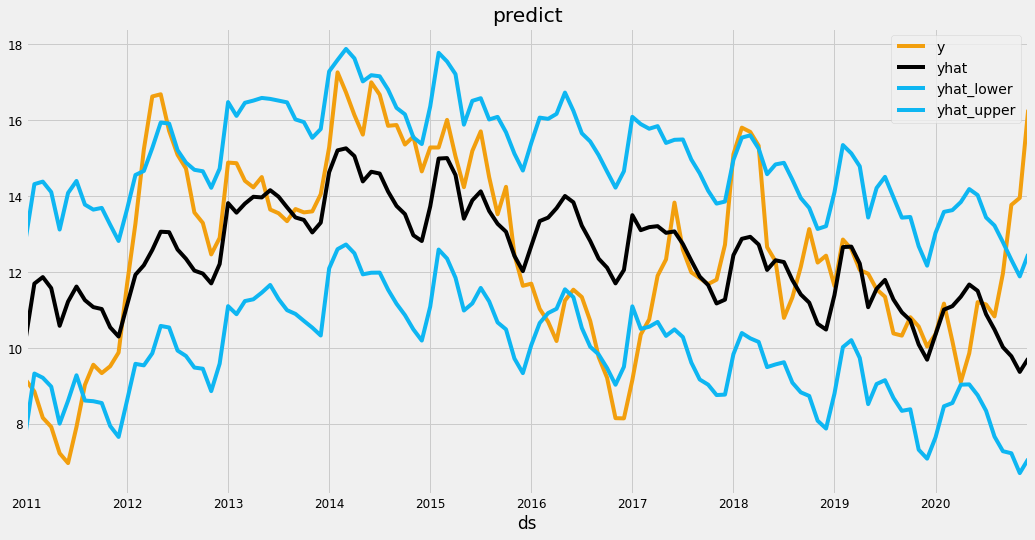

In [82]:
prophet_train_forecast = forecast[['ds','yhat', 'yhat_lower', 'yhat_upper']]
df = pd.merge(prophet_data, prophet_train_forecast, on='ds', how='right')
df.set_index('ds').plot(figsize=(16,8), title= 'predict',color=['#F29F0E', "#000000", "#0EB6F2", "#0EB6F2"], grid=True);

('y') l√† gi√° tr·ªã th·∫≠t, ('yhat') l√† gi√° tr·ªã d·ª± b√°o, ('yhat-lower' v√† 'yhat_upper') cung c·∫•p s·ª± kh√¥ng ch·∫Øc ch·∫Øn c·ªßa d·ª± b√°o


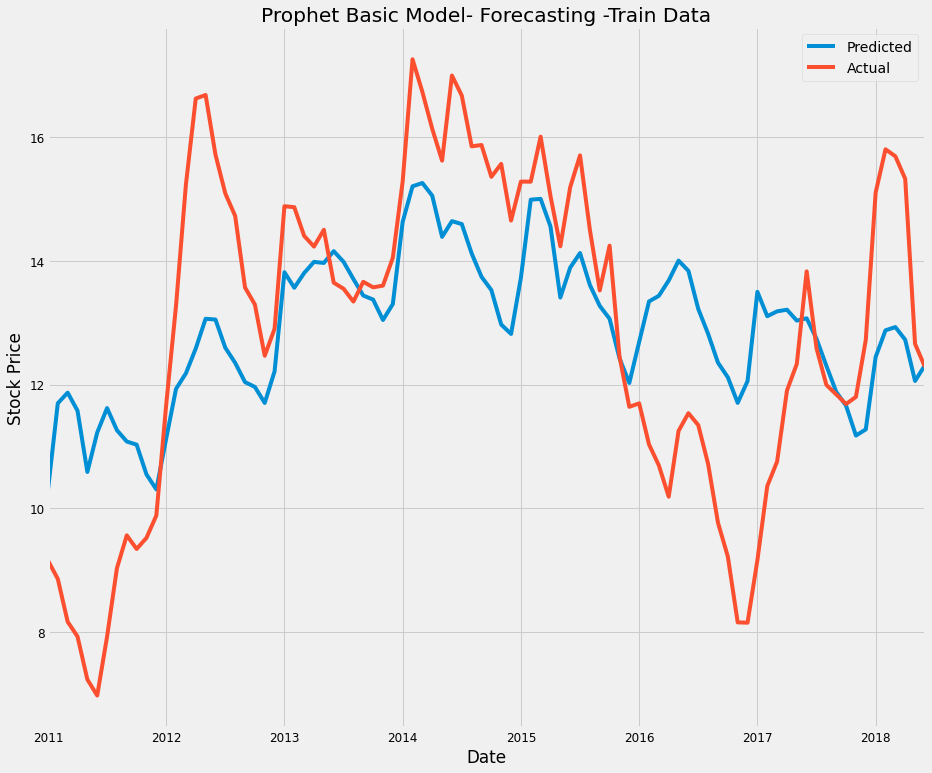

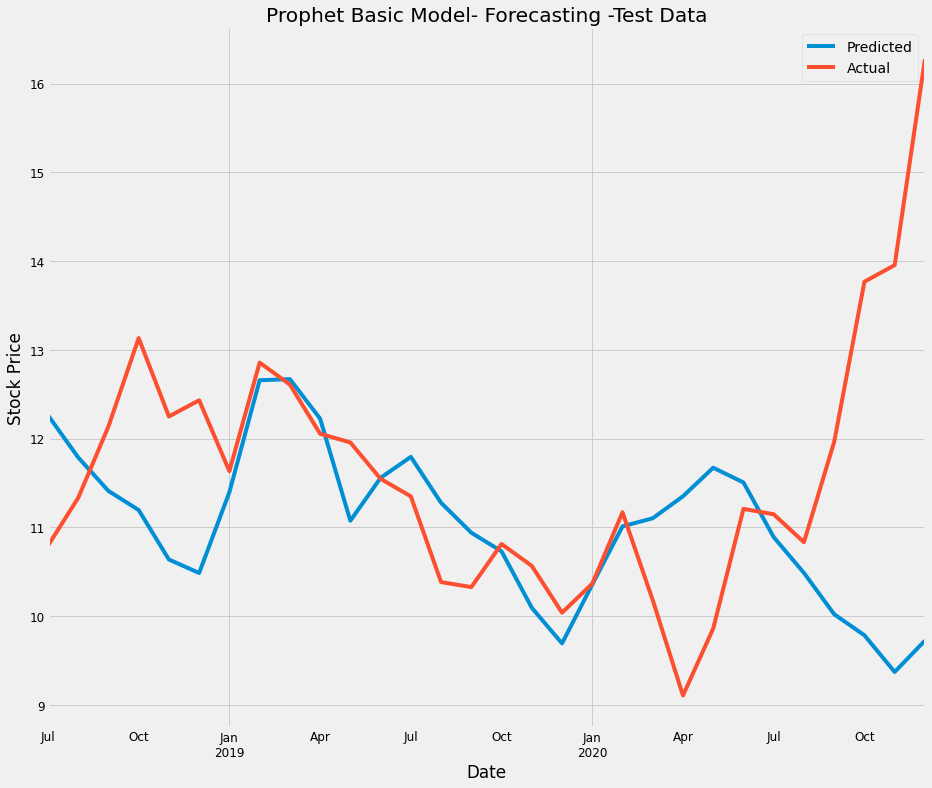

In [83]:
forecast.index = prophet_data['y'].index

prophet_df = pd.concat([forecast['yhat'],prophet_data['y']],axis=1,ignore_index=True)
prophet_df.columns = ['Predicted','Actual']

fig = plt.figure(figsize=(14,12))
prophet_df['Predicted'][:90].plot(label='Predicted')
prophet_df['Actual'][:90].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Train Data')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

fig = plt.figure(figsize=(14,12))
prophet_df['Predicted'][90:].plot(label='Predicted')
prophet_df['Actual'][90:].plot(label='Actual')
plt.title('Prophet Basic Model- Forecasting -Test Data')
plt.ylabel('Stock Price')
plt.legend()

plt.show()

Result Metrics for Prophet Basic-Test Data
Mean Square Error :  3.622
Root Mean Squared Error :  1.903155274800246
Mean Absolute Error :  1.189
Mean Absolute Percentage Error 9.575


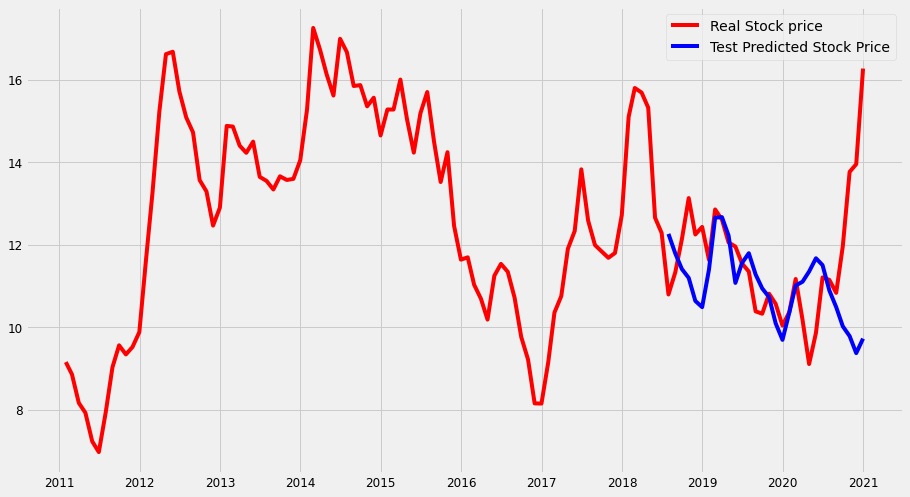

In [84]:
result_metrics_prophet = result_metrics(prophet_df['Actual'][90:],prophet_df['Predicted'][90:],'Prophet Basic-Test Data')

plt.figure(figsize=(14,8))
# plt.plot(prophet_df['Actual'][:90].index, prophet_df['Actual'][:90], color='green', label = 'Train Stock price')
# plt.plot(prophet_df['Predicted'][:90].index, prophet_df['Predicted'][:90], color='blue', label = 'Train Predicted Stock price')
# plt.plot(prophet_df['Actual'][90:].index, prophet_df['Actual'][90:], color='red', label='Real Stock Price')
plt.plot(modelling_series.index, modelling_series, color='red', label = 'Real Stock price')
plt.plot(prophet_df['Predicted'][90:].index, prophet_df['Predicted'][90:], color='blue', label='Test Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()


# LSTM


M·∫°ng n∆°-ron h·ªìi quy(Recurrent Neural Network - RNN). ƒê√¢y l√† m·∫°ng n∆°-ron nh√¢n t·∫°o ƒë∆∞·ª£c thi·∫øt k·∫ø cho vi·ªác x·ª≠ l√Ω c√°c lo·∫°i d·ªØ li·ªáu c√≥ d·∫°ng chu·ªói tu·∫ßn t·ª±. Trong m·∫°ng RNN, tr·∫°ng th√°i ·∫©n t·∫°i m·ªói b∆∞·ªõc th·ªùi gian s·∫Ω ƒë∆∞·ª£c t√≠nh to√°n d·ª±a v√†o d·ªØ li·ªáu ƒë·∫ßu v√†o t·∫°i b∆∞·ªõc th·ªùi gian t∆∞∆°ng ·ª©ng v√† c√°c th√¥ng tin c√≥ ƒë∆∞·ª£c t·ª´ b∆∞·ªõc th·ªùi gian tr∆∞·ªõc ƒë√≥, t·∫°o kh·∫£ nƒÉng ghi nh·ªõ c√°c th√¥ng tin ƒë√£ ƒë∆∞·ª£c t√≠nh to√°n ·ªü nh·ªØng b∆∞·ªõc th·ªùi gian tr∆∞·ªõc cho m·∫°ng. Gradient bi·∫øn m·∫•t(Vanishing GradientProblem) v√† Gradient b√πng n·ªï(Exploding Gradient Problem) l√† nh·ªØng v·∫•n ƒë·ªÅ g·∫∑p ph·∫£i khi s·ª≠ d·ª•ng c√°c k·ªπ thu·∫≠t t·ªëi ∆∞u ho√° tr·ªçng s·ªë d·ª±a tr√™n gradient ƒë·ªÉ hu·∫•n luy·ªán m·∫°ng n∆°-ron. C√°c v·∫•n ƒë·ªÅ n√†y th∆∞·ªùng g·∫∑p ph·∫£i do vi·ªác l·ª±a ch·ªçn c√°c h√†m k√≠ch ho·∫°t kh√¥ng h·ª£p l√Ω ho·∫∑c s·ªë l∆∞·ª£ng c√°c l·ªõp ·∫©n c·ªßa m·∫°ng qu√° l·ªõn. ƒê·∫∑c bi·ªát, c√°c v·∫•n ƒë·ªÅ n√†y th∆∞·ªùng hay xu·∫•t hi·ªán trong qu√° tr√¨nh hu·∫•n luy·ªán c√°c m·∫°ng n∆°-ron h·ªìi quy. 

T√≥m l·∫°i. RNN c√≥ th·ªÉ mang th√¥ng tin t·ª´ state tr∆∞·ªõc t·ªõi c√°c state sau, r·ªìi ·ªü state cu·ªëi l√† s·ª± k·∫øt h·ª£p c·ªßa t·∫•t c·∫£ c√°c th√¥ng tin ƒë·ªÉ d·ª± ƒëo√°n. C√°c state c√†ng xa ·ªü tr∆∞·ªõc ƒë√≥ th√¨ c√†ng b·ªã vanishing gradient v√† c√°c h·ªá s·ªë kh√¥ng ƒë∆∞·ª£c update v·ªõi c√°c state ·ªü xa do ƒë√≥  th·ª±c t·∫ø l√† th√¥ng tin ch·ªâ mang ƒë∆∞·ª£c qua m·ªôt s·ªë l∆∞·ª£ng state nh·∫•t ƒë·ªãnh, sau ƒë√≥ th√¨ s·∫Ω b·ªã vanishing gradient, hay n√≥i c√°ch kh√°c l√† model ch·ªâ h·ªçc ƒë∆∞·ª£c t·ª´ c√°c state g·∫ßn n√≥ => short term memory. V√¨ v·∫≠y, ta c·∫ßn m·ªôt m√¥ h√¨nh m·ªõi ƒë·ªÉ gi·∫£i quy·∫øt v·∫•n ƒë·ªÅ n√†y, v√¨ v·∫≠y LSTM ra ƒë·ªùi. M·∫°ng LSTM ch·ªâ ghi nh·ªõ nh·ªØng th√¥ng tin li√™n quan, quan tr·ªçng trong vi·ªác d·ª± ƒëo√°n, c√≤n c√°c th√¥ng tin kh√°c s·∫Ω ƒë∆∞·ª£c b·ªè ƒëi.

M·∫°ng LSTM cos th·ªÉ g·ªìm nhi·ªÅu t·∫ø b√†o LSTM(LSTM memory cell) li√™n k·∫øt v·ªõi nhau. √ù t∆∞·ªüng c·ªßa LSTM l√† b·ªï sung th√™m tr·∫°ng th√°i b√™n trong t·∫ø b√†o(cell internal state) v√† ba c·ªïng s√†ng l·ªçc c√°c th√¥ng tin ƒë·∫ßu v√†o v√† ƒë·∫ßu ra cho t·∫ø b√†o bao g·ªìm forget gate, input gate, output gate.T·∫°i m·ªói b∆∞·ªõc th·ªùi gian t, c√°c c·ªïng l·∫ßn l∆∞·ª£t nh·∫≠n gi√° tr·ªã ƒë·∫ßu v√†o ùë•ùë° (ƒë·∫°i di·ªán cho m·ªôt ph·∫ßn t·ª≠ trong chu·ªói ƒë·∫ßu v√†o) v√† gi√° tr·ªã ‚Ñéùë°-1 c√≥ ƒë∆∞·ª£c t·ª´ ƒë·∫ßu ra c·ªßa c√°c √¥ nh·ªõ t·ª´ b∆∞·ªõc th·ªùi gian tr∆∞·ªõc ƒë√≥ t ‚Äì 1. C√°c c·ªïng ƒë·ªÅu c√≥ ch·ª©c nƒÉng s√†ng l·ªçc th√¥ng tin v·ªõi m·ªói m·ª•c ƒë√≠ch kh√°c nhau. C√°c c·ªïng ƒë∆∞·ª£c ƒë·ªãnh nghƒ©a nh∆∞ sau:
- Forget gate: C√≥ nhi·ªám v·ª• lo·∫°i b·ªè nh·ªØng th√¥ng tin kh√¥ng c·∫ßn thi·∫øt nh·∫≠n ƒë∆∞·ª£c kh·ªèi cell internal state
- Input gate: C√≥ nhi·ªám v·ª• ch·ªçn l·ªçc nh·ªØng th√¥ng tin c·∫ßn thi·∫øt n√†o ƒë∆∞·ª£c th√™m v√†o cell internal state
- Output gate: C√≥ nhi·ªám v·ª• x√°c ƒë·ªãnh nh·ªØng th√¥ng tin n√†o t·ª´ cell internal state ƒë∆∞·ª£c s·ª≠ d·ª•ng nh∆∞ ƒë·∫ßu ra

In [103]:
col_order = ['Date','Adj Close']
data_feature_selected = data_feature_selected.reindex(columns=col_order)

#Resample Data to Monthly instead of Daily by Aggregating Using Mean
monthly_mean = data_feature_selected['Adj Close'].resample('M').mean()

monthly_data = monthly_mean.to_frame()
scaler = MinMaxScaler(feature_range=(0, 1))
monthly_data['Adj Close'] = scaler.fit_transform(monthly_data['Adj Close'].values.reshape(-1, 1)).flatten()

LSTM c√≥ kh·∫£ nƒÉng ghi nh·ªõ cao nh∆∞ng c≈©ng r·∫•t nh·∫°y c·∫£m v·ªõi c·∫•u tr√∫c c·ªßa d·ªØ li·ªáu ƒë·∫ßu v√†o v√¨ s·ª± ph√¢n t√°n v√† ph·∫°m vi r·∫•t r·ªông c·ªßa d·ªØ li·ªáu th√¥ g√¢y , ƒë·∫∑c bi·ªát khi c√°c h√†m activation sigmoid ho·∫∑c tanh ƒë∆∞·ª£c s·ª≠ d·ª•ng. M√¥ h√¨nh m·∫°ng s·∫Ω ƒë∆∞·ª£c t·ªëi ∆∞u v√† hu·∫•n luy·ªán t·ªët n·∫øu d·ªØ li·ªáu ƒë∆∞·ª£c co gi√£n ph·∫°m vi b·∫±ng vi·ªác ƒë∆∞·ª£c chu·∫©n h√≥a trong (0,1).

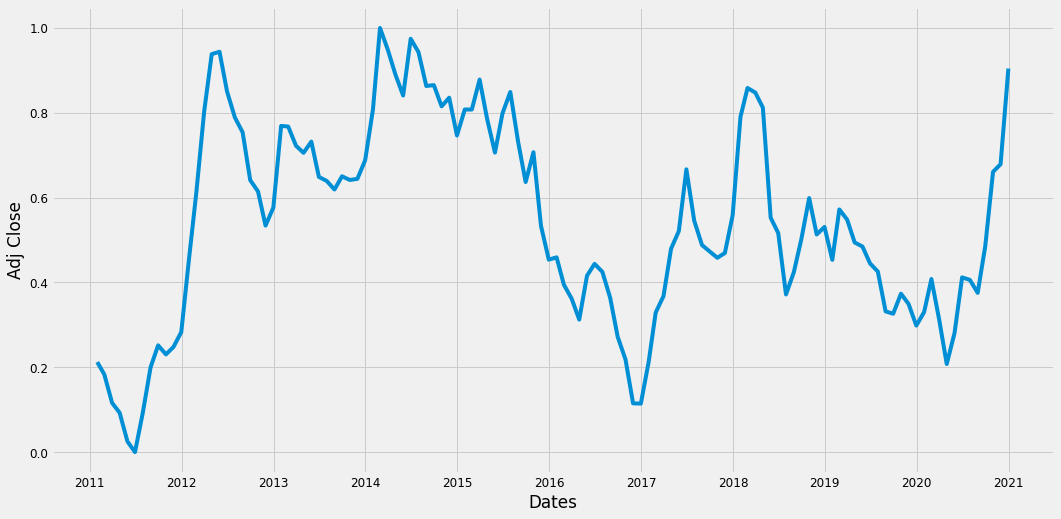

In [104]:
plt.figure(figsize=(16,8))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Adj Close')
plt.plot(monthly_data['Adj Close'])
plt.show()

Ti·∫øp theo, chia train v√† test c·ªßa chu·ªói, d·ªØ li·ªáu train d√πng ƒë·ªÉ hu·∫•n luy·ªán m√¥ h√¨nh v√† test d√πn ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh d·ª± ƒëo√°n. D·ªØ li·ªáu chu·ªói th·ªùi gian khi chia train v√† test ƒëi·ªÅu ch√∫ √Ω l√† ph·∫£i gi·ªØ l·∫°i th·ª© t·ª± c√°c quan s√°t, v√¨ th·∫ø ta ch·ªçn 0.75 c√°c quan s√°t ph·∫ßn ƒë·∫ßu cho d·ªØ li·ªáu train ƒë·ªÉ x√¢y d·ª±ng m√¥ h√¨nh v√† 0.25 c√≤n l·∫°i cho d·ªØ li·ªáu test ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh.

In [105]:
train_size = int(len(monthly_data) * 0.75)
test_size = len(monthly_data) - train_size
train,test = split(monthly_data,train_size=0.75,shuffle=False)

print(len(train), len(test))

90 30


T·∫°o h√†m ƒë·ªÉ c·∫•u h√¨nh d·ªØ li·ªáu. H√†m nh·∫≠n hai ƒë·ªëi s·ªë: t·∫≠p d·ªØ li·ªáu, l√† m·∫£ng numpy m√† ch√∫ng ta mu·ªën chuy·ªÉn ƒë·ªïi th√†nh t·∫≠p d·ªØ li·ªáu v√† look_back l√† s·ªë b∆∞·ªõc th·ªùi gian tr∆∞·ªõc ƒë√≥ ƒë∆∞·ª£c s·ª≠ d·ª•ng l√†m bi·∫øn ƒë·∫ßu v√†o ƒë·ªÉ d·ª± ƒëo√°n kho·∫£n th·ªùi gian ti·∫øp theo. H√†m s·∫Ω t·∫°o m·ªôt t·∫≠p d·ªØ li·ªáu trong ƒë√≥ dataX l√† t·∫≠p g√≠a tr·ªã c·ªï phi·∫øu t·∫°i th·ªùi ƒëi·ªÉm x√°c ƒë·ªãnh(t) v√† Y l√† gi√° c·ªï phi·∫øu t·∫°i th·ªùi ƒëi·ªÉm ti·∫øp theo (t+1)

In [106]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset.iloc[i:(i+look_back), 0].values
        dataX.append(a)
        dataY.append(dataset.iloc[i + look_back, 0])
    return np.array(dataX), np.array(dataY)

In [107]:
look_back = 12
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)



Reshape d·ªØ li·ªáu ƒë·∫ßu v√†o LSTM theo d·∫°ng (samples, time_steps, features) b·ªüi v·ªã theo quy chu·∫©n c·ªßa keras th√¨ ƒë·∫ßu v√†o c·ªßa LSTM c√≥ d·∫°ng (batch_size, time_steps, feature). Batch size: C·ª© hi·ªÉu l√† c√≥ bao nhi√™u c·∫∑p (time_steps, feature) ·∫•y time_steps: Nh∆∞ tr√¨nh b√†y ·ªü tr√™n r·ªìi feature: l√† c√≥ bao nhi√™u thu·ªôc t√≠nh c·ªßa m·ªói ph·∫ßn t·ª≠ trong time_step. V√≠ d·ª• : time_step c√≥ 10 gi√° tr·ªã (m·ªói gi√° tr·ªã l√† m·ªôt vector), m·ªói vector l√† m·ªôt gi√° tr·ªã 2 chi·ªÅu ch·∫≥ng h·∫°n, th√¨ feature ·ªü ƒë√¢y l√† 2 (t·ª©c 2 chi·ªÅu ƒë√≥ ). T√≥m l·∫°i, th√¨ feature c·ª© hi·ªÉu l√† s·ªë thu·ªôc t√≠nh c·ªßa m·ªói ph·∫ßn t·ª≠ time_step. C√≤n reshape ƒë·∫ßu ra m·ª•c ƒë√≠ch l√† t√≠ cho h·ª£p v·ªõi shape ƒë·∫ßu ra c·ªßa m√¥ h√¨nh m·∫°ng. ·ªû tr√™n ta th·∫•y d√πng 30 ƒë·ªÉ ƒëo√°n 1, n√™n ƒë·∫ßu ra ·ªü ƒë√¢y ph·∫£i reshape theo (-1,1).

Hi·ªán t·∫°i d·ªØ li·ªáu ƒëang ·ªü d·∫°ng (samples, features). V√¨ v·∫≠y ta s·∫Ω chuy·ªÉn ƒë·ªïi sang d·∫°ng (samples, time_steps, features) b·∫±ng reshape()

In [110]:
# reshape input to be [samples, time steps, features] which is required for LSTM
trainX =trainX.reshape(trainX.shape[0], 12, trainX.shape[1])
testX = testX.reshape(testX.shape[0], 12, testX.shape[1])


X√¢y d·ª±ng m·∫°ng LSTM ƒë·∫ßu ti√™n l√† kh·ªüi t·∫°o l·ªõp m√¥ h√¨nh Sequential v√† th√™m c√°c l·ªõp LSTM, Dropout v√† Dense cho m√¥ h√¨nh n√†y. Cu·ªëi c√πng ta cho qua m·ªôt t·∫ßng k·∫øt n·ªëi Dense v·ªõi ƒë·∫ßu ra l√† 1 chi·ªÅu. epochs l√† s·ªë l∆∞·ª£ng phi√™n c·∫≠p nh·∫≠t tr√™n to√†n b·ªô d·ªØ li·ªáu, batch_size l√† l∆∞·ª£ng quan s√°t ƒë∆∞·ª£c s·ª≠ d·ª•ng trong 1 phi√™n c·∫≠p nh·∫≠t, khai b√°o tham s·ªë shuffle l√† False nh·∫±m v√¥ hi·ªáu h√≥a x√°o tr·ªôn m·∫´u cho chu·ªói th·ªùi gian v√† verbose = 0 ƒë·ªÉ ·∫©n qu√° tr√¨nh ch·∫°y model. H√†m m·∫•t m√°t ƒë∆∞·ª£c s·ª≠ d·ª•ng trong m·∫°ng neuron n√†y l√† mean_squared_error c·∫≠p nh·∫≠t b·ªüi thu·∫≠t to√°n Adam.

In [111]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50, return_sequences = True, input_shape = (trainX.shape[1], 1)))
model.add(Dropout(0.2))
# Adding a second LSTM layer and some Dropout regularisation
model.add(LSTM(units = 50))
model.add(Dropout(0.2))
# # Adding a third LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50, return_sequences = True))
# model.add(Dropout(0.2))
# Adding a fourth LSTM layer and some Dropout regularisation
# model.add(LSTM(units = 50))
# model.add(Dropout(0.2))
# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(loss='mean_squared_error', optimizer='adam')
history =  model.fit( trainX,trainY, validation_data = (testX,testY), epochs = 100 , batch_size = 1, verbose = 2, shuffle = False)
#model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2, shuffle = False)

Epoch 1/100
77/77 - 6s - loss: 0.0827 - val_loss: 0.0205
Epoch 2/100
77/77 - 1s - loss: 0.0617 - val_loss: 0.0189
Epoch 3/100
77/77 - 1s - loss: 0.0577 - val_loss: 0.0150
Epoch 4/100
77/77 - 1s - loss: 0.0498 - val_loss: 0.0142
Epoch 5/100
77/77 - 0s - loss: 0.0534 - val_loss: 0.0144
Epoch 6/100
77/77 - 0s - loss: 0.0444 - val_loss: 0.0133
Epoch 7/100
77/77 - 1s - loss: 0.0416 - val_loss: 0.0139
Epoch 8/100
77/77 - 1s - loss: 0.0493 - val_loss: 0.0122
Epoch 9/100
77/77 - 0s - loss: 0.0343 - val_loss: 0.0122
Epoch 10/100
77/77 - 0s - loss: 0.0452 - val_loss: 0.0120
Epoch 11/100
77/77 - 1s - loss: 0.0398 - val_loss: 0.0127
Epoch 12/100
77/77 - 0s - loss: 0.0352 - val_loss: 0.0115
Epoch 13/100
77/77 - 0s - loss: 0.0407 - val_loss: 0.0103
Epoch 14/100
77/77 - 1s - loss: 0.0277 - val_loss: 0.0099
Epoch 15/100
77/77 - 1s - loss: 0.0322 - val_loss: 0.0086
Epoch 16/100
77/77 - 0s - loss: 0.0287 - val_loss: 0.0088
Epoch 17/100
77/77 - 0s - loss: 0.0347 - val_loss: 0.0075
Epoch 18/100
77/77 - 1s

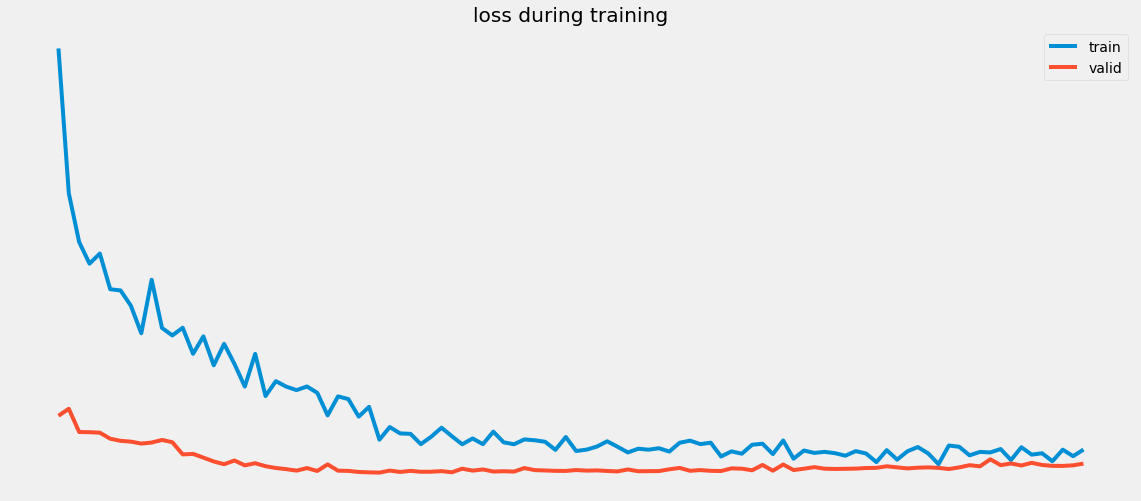

In [40]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='valid')
plt.legend()
plt.yticks([])
plt.xticks([])
plt.title("loss during training")
plt.show()

Sau khi d·ª± ƒëo√°n xong th√¨ ch√∫ng ta th·ª±c hi·ªán inverse transform trainX v√† testX ƒë·ªÉ ƒë∆∞a v·ªÅ k·∫øt qu·∫£ th·ª±c v√¨ tr∆∞·ªõc ƒë√£ chu·∫©n h√≥a ch√∫ng n·∫±m trong (0,1). ƒê·ªìng th·ªùi, ƒë∆∞a ra c√°c sai s·ªë gi·ªØa k·∫øt qu·∫£ th·ª±c t·∫ø v√† d·ª± ƒëo√°n.

In [37]:
def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
# trainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
# print('Train Score: %.2f RMSE' % (trainScore))
# testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
# print('R2 Score : ',round(r2_score(testY[0],testPredict[:,0]),3))
# print('Mean Squared Error : ',round(mean_squared_error(testY[0],testPredict[:,0]),3))
# print('Mean Absolute Error : ',round(mean_absolute_error(testY[0],testPredict[:,0]),3))
# print('Mean Absolute Percentage Error',round(mean_absolute_percentage_error(testY[0],testPredict[:,0]),3))
result_metrics_lstm = result_metrics(testY[0],testPredict[:,0],"LSTM test data")

Result Metrics for LSTM test data
Mean Square Error :  0.828
Root Mean Squared Error :  0.909945053286186
Mean Absolute Error :  0.815
Mean Absolute Percentage Error 7.488


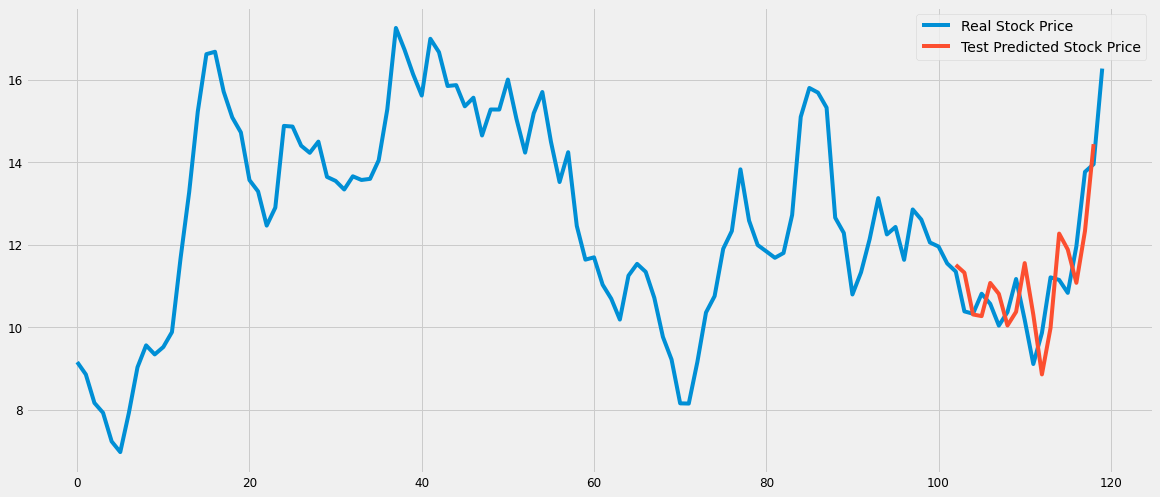

In [38]:
trainPredictPlot = np.empty_like(monthly_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(monthly_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(monthly_data)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(monthly_data), label='Real Stock Price')
plt.plot(testPredictPlot, label='Test Predicted Stock Price')
plt.grid(True)
plt.legend()
plt.show()

In [39]:
listmetrics = []
listmetrics.extend(['Mean Square Error','Root Mean Squared Error','Mean Absolute Error','Mean Absolute Percentage Error'])
myTable = PrettyTable(["Metrics", "Sarima", "Prophet", "Lstm"])
for i in range(len(result_metrics_sarima)):
    myTable.add_row([listmetrics[i], result_metrics_sarima[i], result_metrics_prophet[i], result_metrics_lstm[i]])
    
print(myTable)

+--------------------------------+--------------------+-------------------+-------------------+
|            Metrics             |       Sarima       |      Prophet      |        Lstm       |
+--------------------------------+--------------------+-------------------+-------------------+
|       Mean Square Error        |       1.669        |       3.622       |       0.828       |
|    Root Mean Squared Error     | 1.2918978287774927 | 1.903155274800246 | 0.909945053286186 |
|      Mean Absolute Error       |       0.791        |       1.189       |       0.815       |
| Mean Absolute Percentage Error |       6.405        |       9.575       |       7.488       |
+--------------------------------+--------------------+-------------------+-------------------+
